In [338]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore') #ignora os avisos

In [339]:
pd.options.display.float_format = "{:,.2f}".format #ajusta o formato numérico exibido

# Aula 01: Aquisição e leitura de dados reais

Vamos começar importando nosso banco de dados. O arquivo csv que será lido no código abaixo foi gerado após uma consulta no site DATASUS. Eis o link, caso queira fazer a própria consulta:
http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qi

A tabela mostra a produção hospitalar mensal (em reais) por unidade federativa, desde Janeiro de 2008 até Março de 2021. Os dados estão coletados por data de processamento. Isto é, se um dado se encontra na coluna 2008/Jan, siginifica que esse dado foi processado naquele mês. Porém o evento ao qual ele se refere pode ter ocorrido em qualquer data anterior. 

In [340]:
dados_proc = pd.read_csv("/content/A144053189_28_143_208.csv", encoding="ISO-8859-1", 
                    skiprows = 3, sep=";", skipfooter=12,
                    thousands=".", decimal=",")
dados_proc

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,"1,388,528.39","2,931,283.42","1,541,682.52","1,525,314.96","1,645,953.84","1,406,150.68","3,065,279.01","3,231,494.61","3,117,178.63","3,068,430.44","2,825,838.52","2,931,173.58","2,885,269.07","2,860,103.74","3,684,944.68","3,607,289.68","3,774,356.60","3,706,711.84","3,763,187.55","3,533,625.83",3605007.43,"3,907,032.72","3,939,820.71","3,901,084.11","3,684,407.02","3,623,015.58","3,890,461.90","4,193,533.87","4,534,400.67","4,451,208.03","4,874,592.78","4,460,802.38","5,067,886.24","4,511,092.85","4,394,680.50","4,098,741.80","4,411,499.48","3,868,617.95","4,298,702.78",...,"7,998,345.94","8,893,683.69","8,867,793.32","8,871,408.50","8,501,601.67","8,315,107.81","8,525,499.78","9,177,611.46","7,368,996.38","8,835,095.43","8,328,186.64","8,408,512.77","9,351,705.82","8,143,007.97","8,949,741.77","9,630,553.15","9,581,970.31","7,891,114.05","9,792,370.67","9,170,787.53","8,816,846.71","10,024,554.15","9,675,423.70","8,085,025.66","9,222,010.60","7,493,901.30","8,148,169.46","7,353,768.37","7,739,864.47","9,246,097.96","11,824,687.13","11,733,307.76","10,201,985.14","7,955,139.45","9,357,946.29","8,880,836.55","9,266,014.59","7,730,597.04","11,023,309.47","996,411,254.68"
1,12 Acre,"902,416.00","1,497,206.26","1,794,028.48","1,730,469.42","1,819,443.92","1,828,496.00","2,511,754.59","2,089,107.14","2,275,708.53","1,923,886.57","1,756,986.80","2,235,639.98","2,497,116.43","2,253,558.01","2,122,673.92","2,834,317.62","2,722,065.97","2,432,831.95","2,630,190.65","2,307,579.00",-,"2,826,477.02","2,170,791.18","2,541,526.44","2,491,042.33","1,954,473.90","2,389,996.38","2,654,878.60","2,844,085.21","2,336,207.19","2,125,143.06","2,430,293.67","2,377,738.44","2,184,746.84","2,468,452.90","2,516,284.54","3,051,370.08","2,629,104.42","2,485,451.79",...,"3,576,595.19","2,444,567.37","2,602,434.35","3,064,163.42","2,276,236.69","3,239,474.10","3,126,429.88","2,998,865.51","2,619,709.86","3,018,048.94","3,342,614.24","2,123,426.26","2,664,654.52","1,906,429.95","3,096,439.63","2,411,628.00","2,840,630.58","3,260,153.59","3,250,722.84","3,204,998.88","3,052,745.65","3,124,802.29","3,021,521.75","2,874,871.28","3,331,803.55","3,417,691.07","3,076,003.20","2,286,642.60","2,896,340.24","3,045,245.80","3,915,193.20","3,640,142.82","3,391,242.21","4,044,321.44","3,276,590.10","3,696,997.31","3,715,723.12","3,538,427.92","4,077,045.92","450,048,530.47"
2,13 Amazonas,"4,735,529.42","7,118,990.57","8,196,635.49","8,259,378.42","7,831,399.90","8,477,273.62","9,368,858.72","9,352,532.70","9,363,099.35","8,618,318.83","6,555,549.08","7,777,645.88","7,403,068.36","6,683,346.89","9,927,781.20","8,844,511.21","9,079,035.96","8,832,894.53","9,373,395.97","9,578,326.03",9730634.16,"9,179,252.65","8,314,648.93","9,050,439.39","9,419,460.86","8,680,178.57","9,168,055.41","9,897,901.80","9,651,362.37","10,854,599.47","10,417,122.89","8,718,347.13","8,221,592.12","9,613,977.03","9,927,574.41","9,470,661.21","9,736,750.91","8,745,259.80","9,380,112.36",...,"13,572,263.03","13,083,081.70","14,322,305.22","14,643,340.51","14,632,208.09","14,500,521.14","14,840,533.42","14,427,620.91","15,818,964.25","16,358,462.57","15,391,163.74","14,154,362.85","16,791,397.31","14,369,987.43","16,339,024.96","15,622,910.63","16,483,166.92","

Percebemos que os nomes das unidades federativas estão num formato ruim. Vamos retirar esses números da frente dos nomes. 

In [341]:
dados_proc['Unidade da Federação'] = dados_proc['Unidade da Federação'].str.slice(3,)
dados_proc

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,Rondônia,"1,388,528.39","2,931,283.42","1,541,682.52","1,525,314.96","1,645,953.84","1,406,150.68","3,065,279.01","3,231,494.61","3,117,178.63","3,068,430.44","2,825,838.52","2,931,173.58","2,885,269.07","2,860,103.74","3,684,944.68","3,607,289.68","3,774,356.60","3,706,711.84","3,763,187.55","3,533,625.83",3605007.43,"3,907,032.72","3,939,820.71","3,901,084.11","3,684,407.02","3,623,015.58","3,890,461.90","4,193,533.87","4,534,400.67","4,451,208.03","4,874,592.78","4,460,802.38","5,067,886.24","4,511,092.85","4,394,680.50","4,098,741.80","4,411,499.48","3,868,617.95","4,298,702.78",...,"7,998,345.94","8,893,683.69","8,867,793.32","8,871,408.50","8,501,601.67","8,315,107.81","8,525,499.78","9,177,611.46","7,368,996.38","8,835,095.43","8,328,186.64","8,408,512.77","9,351,705.82","8,143,007.97","8,949,741.77","9,630,553.15","9,581,970.31","7,891,114.05","9,792,370.67","9,170,787.53","8,816,846.71","10,024,554.15","9,675,423.70","8,085,025.66","9,222,010.60","7,493,901.30","8,148,169.46","7,353,768.37","7,739,864.47","9,246,097.96","11,824,687.13","11,733,307.76","10,201,985.14","7,955,139.45","9,357,946.29","8,880,836.55","9,266,014.59","7,730,597.04","11,023,309.47","996,411,254.68"
1,Acre,"902,416.00","1,497,206.26","1,794,028.48","1,730,469.42","1,819,443.92","1,828,496.00","2,511,754.59","2,089,107.14","2,275,708.53","1,923,886.57","1,756,986.80","2,235,639.98","2,497,116.43","2,253,558.01","2,122,673.92","2,834,317.62","2,722,065.97","2,432,831.95","2,630,190.65","2,307,579.00",-,"2,826,477.02","2,170,791.18","2,541,526.44","2,491,042.33","1,954,473.90","2,389,996.38","2,654,878.60","2,844,085.21","2,336,207.19","2,125,143.06","2,430,293.67","2,377,738.44","2,184,746.84","2,468,452.90","2,516,284.54","3,051,370.08","2,629,104.42","2,485,451.79",...,"3,576,595.19","2,444,567.37","2,602,434.35","3,064,163.42","2,276,236.69","3,239,474.10","3,126,429.88","2,998,865.51","2,619,709.86","3,018,048.94","3,342,614.24","2,123,426.26","2,664,654.52","1,906,429.95","3,096,439.63","2,411,628.00","2,840,630.58","3,260,153.59","3,250,722.84","3,204,998.88","3,052,745.65","3,124,802.29","3,021,521.75","2,874,871.28","3,331,803.55","3,417,691.07","3,076,003.20","2,286,642.60","2,896,340.24","3,045,245.80","3,915,193.20","3,640,142.82","3,391,242.21","4,044,321.44","3,276,590.10","3,696,997.31","3,715,723.12","3,538,427.92","4,077,045.92","450,048,530.47"
2,Amazonas,"4,735,529.42","7,118,990.57","8,196,635.49","8,259,378.42","7,831,399.90","8,477,273.62","9,368,858.72","9,352,532.70","9,363,099.35","8,618,318.83","6,555,549.08","7,777,645.88","7,403,068.36","6,683,346.89","9,927,781.20","8,844,511.21","9,079,035.96","8,832,894.53","9,373,395.97","9,578,326.03",9730634.16,"9,179,252.65","8,314,648.93","9,050,439.39","9,419,460.86","8,680,178.57","9,168,055.41","9,897,901.80","9,651,362.37","10,854,599.47","10,417,122.89","8,718,347.13","8,221,592.12","9,613,977.03","9,927,574.41","9,470,661.21","9,736,750.91","8,745,259.80","9,380,112.36",...,"13,572,263.03","13,083,081.70","14,322,305.22","14,643,340.51","14,632,208.09","14,500,521.14","14,840,533.42","14,427,620.91","15,818,964.25","16,358,462.57","15,391,163.74","14,154,362.85","16,791,397.31","14,369,987.43","16,339,024.96","15,622,910.63","16,483,166.92","15,422,24

Vejamos a média dos dados:

In [342]:
dados_proc.mean()

2008/Jan      15,126,846.64
2008/Fev      22,710,158.12
2008/Mar      24,594,187.35
2008/Abr      25,431,957.83
2008/Mai      26,511,245.91
                 ...       
2020/Dez      53,377,763.15
2021/Jan      56,073,748.02
2021/Fev      55,578,233.31
2021/Mar      62,502,301.42
Total      6,388,213,338.48
Length: 159, dtype: float64

Se quisermos, podemos consultar a média de apenas um dos meses:

In [343]:
dados_proc['2008/Ago'].mean()

27800320.306666665

É possível consultar também a média por unidade da federação. Para isso, podemos passar o parâmetro axis = 1 na função mean()

In [344]:
dados_proc.mean(axis = 1)

0     12,510,801.90
1      5,660,987.80
2     24,055,127.28
3      4,126,115.21
4     59,010,377.58
5      3,884,816.70
6     12,789,393.88
7     48,568,654.72
8     28,613,399.86
9     82,699,381.89
10    33,377,548.66
11    32,790,694.40
12   107,700,684.80
13    28,060,754.41
14    15,253,864.33
15   122,825,434.42
16   256,229,962.25
17    42,744,145.12
18   129,702,859.17
19   519,326,513.43
20   184,259,028.86
21    98,318,502.79
22   160,140,612.27
23    29,163,851.68
24    27,354,900.26
25    62,402,008.69
26    32,517,978.95
dtype: float64

Poodemos filtrar a análise acima por estado, digamos, Ceará (meu estado natal):

In [345]:
dados_proc[dados_proc['Unidade da Federação'] == 'Ceará'].mean(axis = 1)

9   82,699,381.89
dtype: float64

Agora vamos criar alguns gráficos. Primeiramente, gráficos de barra com informações dos gastos por estado em Agosto de 2008 e Março de 2021.

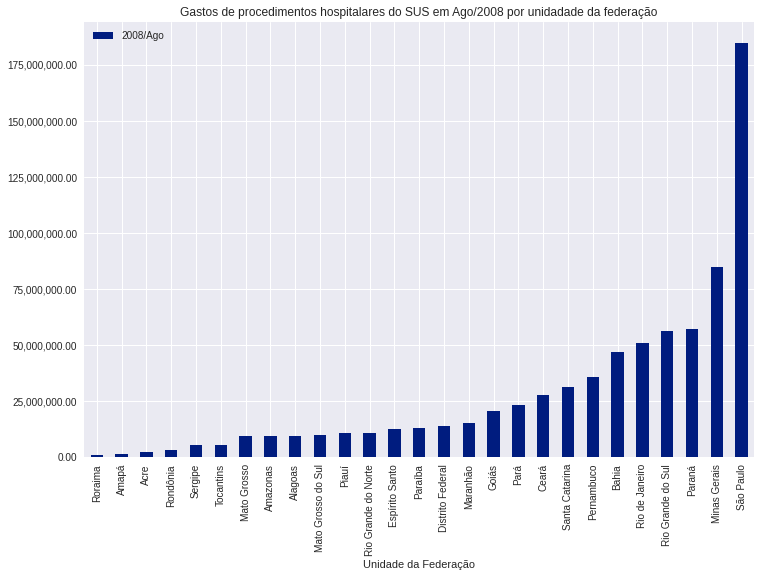

In [346]:
import matplotlib.ticker as ticker

ax = dados_proc.sort_values(by = '2008/Ago').plot(x="Unidade da Federação", y="2008/Ago", kind = 'bar', figsize = (12,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title('Gastos de procedimentos hospitalares do SUS em Ago/2008 por unidadade da federação')
plt.show()

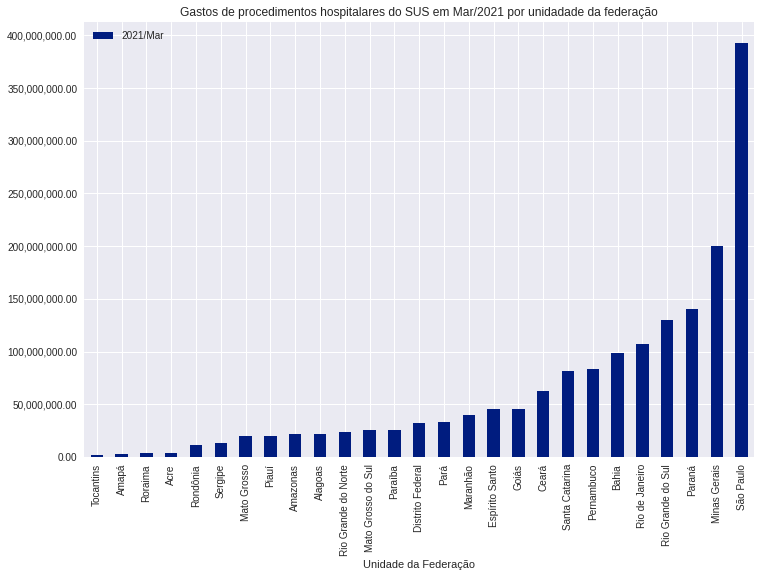

In [347]:
ax = dados_proc.sort_values(by = '2021/Mar').plot(x="Unidade da Federação", y="2021/Mar", kind = 'bar', figsize = (12,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title('Gastos de procedimentos hospitalares do SUS em Mar/2021 por unidadade da federação')
plt.show()

Percebemos uma maior concentração de recuros no Sul e Sudeste, sendo que São Paulo está disparado em primeiro lugar.

Podemos visualizar graficamente a evolução dos gastos ao longo dos meses em um estado específico (e.g., Ceará).

In [348]:
gastos_CE = dados_proc.iloc[9][1:160].astype(float) #pegamos de 1 a 160 para excluir as colunas 'unidade da federação' e 'total'. Usamos o astype(float) pois há entradas que são string.
gastos_CE

2008/Jan   15,539,821.90
2008/Fev   25,735,101.55
2008/Mar   28,724,625.75
2008/Abr   30,676,457.06
2008/Mai   30,604,453.47
                ...     
2020/Nov   56,916,499.66
2020/Dez   50,849,353.22
2021/Jan   52,078,218.88
2021/Fev   53,171,253.41
2021/Mar   62,079,618.54
Name: 9, Length: 159, dtype: float64

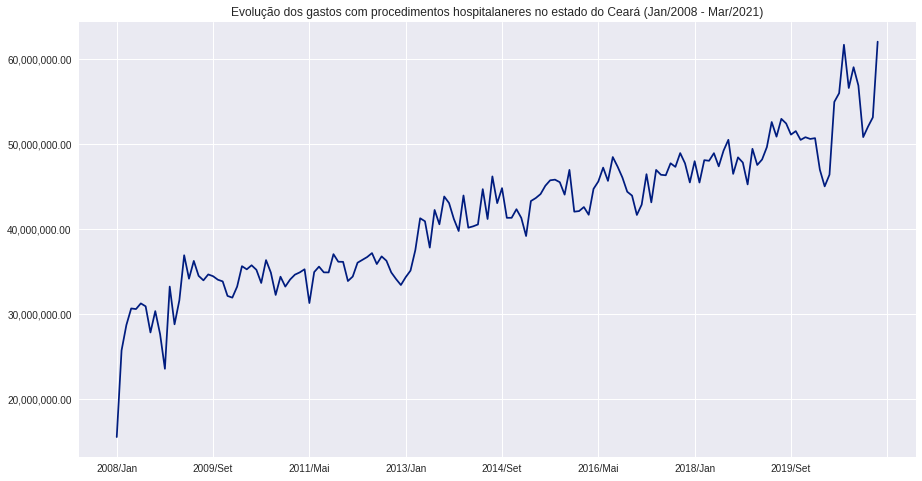

In [349]:
ax = gastos_CE.plot(figsize = (15,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title('Evolução dos gastos com procedimentos hospitalaneres no estado do Ceará (Jan/2008 - Mar/2021)')
plt.show()

Observamos então que há uma tendência de aumento dos gastos. 

#Aula 02: Primeiras visualizações de dados

In [350]:
dados_atend = pd.read_csv("/content/A184117189_28_143_208.csv", encoding="ISO-8859-1", 
                    skiprows = 3, sep=";", skipfooter=12,
                    thousands=".", decimal=",")
dados_atend

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"8,457,455.71","7,766,983.20","8,858,845.57","8,407,076.44","9,492,938.92","8,206,195.92","9,011,612.58","9,124,967.84","8,406,732.72","8,411,360.02","8,651,081.66","8,193,425.99","8,388,269.45","8,645,315.78","9,050,329.13","9,211,262.51","9,490,545.02","8,600,886.20","8,919,190.86","8,909,111.89","8,409,386.09","8,924,348.41","8,948,605.66","8,660,753.05","8,327,665.97","8,431,334.62","7,251,287.20","7,490,440.60","8,957,706.45","10,993,332.84","10,479,989.36","11,433,467.56","8,876,900.39","8,167,253.19","8,759,013.71","9,003,402.23","8,414,690.60","6,039,419.59","4,732,441.04","996,411,254.68"
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"2,968,168.75","2,769,797.39","3,057,631.96","2,874,965.31","3,175,575.17","3,060,903.21","3,253,011.61","3,040,645.05","2,926,179.27","3,126,120.64","2,473,454.85","2,277,493.49","2,594,347.32","2,234,388.36","2,473,008.49","2,979,764.77","3,070,533.95","3,249,052.69","3,567,538.64","2,981,072.98","2,998,860.31","3,293,378.97","3,174,249.43","2,959,569.09","3,276,790.55","2,985,763.71","2,939,675.20","2,672,857.33","2,940,827.86","3,914,823.86","4,053,085.41","3,658,265.59","3,470,409.45","3,267,918.69","3,393,958.27","3,711,660.71","3,005,561.16","2,272,733.90","1,137,341.65","450,048,530.47"
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"14,549,450.86","12,753,555.36","14,749,409.47","14,577,930.81","15,381,061.96","14,653,650.77","15,544,595.79","16,374,961.41","15,343,340.93","16,249,963.61","14,255,408.82","14,274,053.94","15,358,914.00","14,100,074.56","16,103,971.89","16,154,491.82","16,529,976.06","15,509,984.83","16,642,220.71","16,493,719.52","15,351,607.47","16,339,427.95","14,821,977.50","14,965,815.90","15,982,353.42","15,166,470.82","14,815,958.58","16,379,386.07","19,625,325.21","18,433,057.47","19,303,743.16","18,687,233.58","18,628,627.49","18,728,251.20","20,451,573.77","21,546,059.48","24,439,059.57","13,679,358.06","6,799,060.80","1,917,247,936.05"
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"2,740,952.07","2,478,349.44","2,674,958.94","2,721,261.19","2,844,811.66","2,967,161.35","2,841,587.97","3,328,230.63","2,878,691.04","2,964,324.32","2,524,712.40","2,462,451.64","2,662,240.18","2,499,996.16","2,846,135.56","2,789,823.29","2,839,389.53","2,647,540.20","2,865,777.71","3,181,321.82","3,070,436.96","3,162,342.44","3,121,104.71","2,889,969.87","3,084,561.08","2,967,159.04","2,813,954.05","2,306,119.95","2,921,522.16","3,300,012.98","3,192,075.41","3,262,354.34","2,978,629.22","3,313,296.78","3,527,263.23","3,125,021.90","3,209,323.68","3,044,798.77","2,381,844.31","328,876,965.09"
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"33,615,836.09","30,623,491.62","34,121,931.00","35,039,954.20","35,424,611.06","34,160,283.18","34,484,949.49","35,618,364.04","34,380,916.90","38,441,090.50","33,583,538.08","32,789,354.87","34,513,534.80","31,885,919.67","33,236,155.79","31,008,924.95","31,064,106.50","28,543,179.30","36,713,929.36","36,462,011.47","36,792,954.02","36,984,

In [351]:
dados_atend['Unidade da Federação'] = dados_atend['Unidade da Federação'].str.slice(3,)
dados_atend

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"8,457,455.71","7,766,983.20","8,858,845.57","8,407,076.44","9,492,938.92","8,206,195.92","9,011,612.58","9,124,967.84","8,406,732.72","8,411,360.02","8,651,081.66","8,193,425.99","8,388,269.45","8,645,315.78","9,050,329.13","9,211,262.51","9,490,545.02","8,600,886.20","8,919,190.86","8,909,111.89","8,409,386.09","8,924,348.41","8,948,605.66","8,660,753.05","8,327,665.97","8,431,334.62","7,251,287.20","7,490,440.60","8,957,706.45","10,993,332.84","10,479,989.36","11,433,467.56","8,876,900.39","8,167,253.19","8,759,013.71","9,003,402.23","8,414,690.60","6,039,419.59","4,732,441.04","996,411,254.68"
1,Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"2,968,168.75","2,769,797.39","3,057,631.96","2,874,965.31","3,175,575.17","3,060,903.21","3,253,011.61","3,040,645.05","2,926,179.27","3,126,120.64","2,473,454.85","2,277,493.49","2,594,347.32","2,234,388.36","2,473,008.49","2,979,764.77","3,070,533.95","3,249,052.69","3,567,538.64","2,981,072.98","2,998,860.31","3,293,378.97","3,174,249.43","2,959,569.09","3,276,790.55","2,985,763.71","2,939,675.20","2,672,857.33","2,940,827.86","3,914,823.86","4,053,085.41","3,658,265.59","3,470,409.45","3,267,918.69","3,393,958.27","3,711,660.71","3,005,561.16","2,272,733.90","1,137,341.65","450,048,530.47"
2,Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"14,549,450.86","12,753,555.36","14,749,409.47","14,577,930.81","15,381,061.96","14,653,650.77","15,544,595.79","16,374,961.41","15,343,340.93","16,249,963.61","14,255,408.82","14,274,053.94","15,358,914.00","14,100,074.56","16,103,971.89","16,154,491.82","16,529,976.06","15,509,984.83","16,642,220.71","16,493,719.52","15,351,607.47","16,339,427.95","14,821,977.50","14,965,815.90","15,982,353.42","15,166,470.82","14,815,958.58","16,379,386.07","19,625,325.21","18,433,057.47","19,303,743.16","18,687,233.58","18,628,627.49","18,728,251.20","20,451,573.77","21,546,059.48","24,439,059.57","13,679,358.06","6,799,060.80","1,917,247,936.05"
3,Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"2,740,952.07","2,478,349.44","2,674,958.94","2,721,261.19","2,844,811.66","2,967,161.35","2,841,587.97","3,328,230.63","2,878,691.04","2,964,324.32","2,524,712.40","2,462,451.64","2,662,240.18","2,499,996.16","2,846,135.56","2,789,823.29","2,839,389.53","2,647,540.20","2,865,777.71","3,181,321.82","3,070,436.96","3,162,342.44","3,121,104.71","2,889,969.87","3,084,561.08","2,967,159.04","2,813,954.05","2,306,119.95","2,921,522.16","3,300,012.98","3,192,075.41","3,262,354.34","2,978,629.22","3,313,296.78","3,527,263.23","3,125,021.90","3,209,323.68","3,044,798.77","2,381,844.31","328,876,965.09"
4,Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"33,615,836.09","30,623,491.62","34,121,931.00","35,039,954.20","35,424,611.06","34,160,283.18","34,484,949.49","35,618,364.04","34,380,916.90","38,441,090.50","33,583,538.08","32,789,354.87","34,513,534.80","31,885,919.67","33,236,155.79","31,008,924.95","31,064,106.50","28,543,179.30","36,713,929.36","36,462,011.47","36,792,954.02","36,984,314.60","35,579

In [352]:
dados_atend.dtypes

Unidade da Federação     object
1992/Mar                 object
1992/Abr                 object
1993/Mai                 object
1993/Dez                 object
                         ...   
2020/Dez                float64
2021/Jan                float64
2021/Fev                float64
2021/Mar                float64
Total                   float64
Length: 287, dtype: object

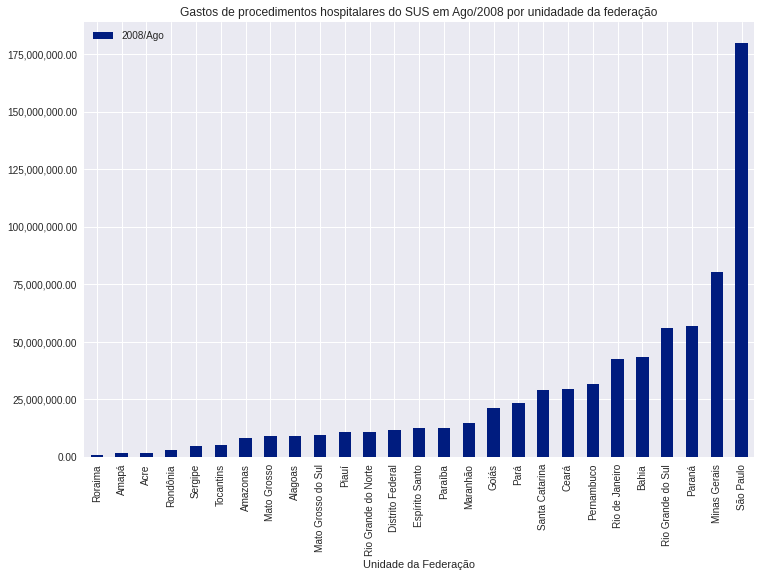

In [353]:
import matplotlib.ticker as ticker

ax = dados_atend.sort_values(by = '2008/Ago').plot(x="Unidade da Federação", y="2008/Ago", kind = 'bar', figsize = (12,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title('Gastos de procedimentos hospitalares do SUS em Ago/2008 por unidadade da federação')
plt.show()

In [354]:
colunas_usaveis = dados_atend.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")
colunas_usaveis

['Unidade da Federação',
 '2007/Ago',
 '2007/Set',
 '2007/Out',
 '2007/Nov',
 '2007/Dez',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',


In [355]:
dados = dados_atend[colunas_usaveis]
dados.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,Rondônia,"4,209.37","16,397.03","133,645.19","346,912.84","711,758.31","1,829,559.71","1,940,792.63","1,955,721.68","2,143,353.81","2,280,382.58","2,624,542.97","2,973,421.02","2,938,286.29","2,843,930.91","2,878,153.20","2,780,022.62","2,651,804.89","3,147,566.24","3,082,108.12","4,190,355.33","4,040,251.62","3,946,423.71","3,372,377.96","3,720,608.86","3,787,323.26","3,679,369.94","3,866,146.99","3,667,808.60","3,633,471.79","3,812,315.59","3,911,776.03","4,663,060.75","4,524,544.88","4,778,755.26","4,369,733.23","4,632,439.12","4,464,307.47","4,668,642.02","4,490,368.23",...,"8,457,455.71","7,766,983.20","8,858,845.57","8,407,076.44","9,492,938.92","8,206,195.92","9,011,612.58","9,124,967.84","8,406,732.72","8,411,360.02","8,651,081.66","8,193,425.99","8,388,269.45","8,645,315.78","9,050,329.13","9,211,262.51","9,490,545.02","8,600,886.20","8,919,190.86","8,909,111.89","8,409,386.09","8,924,348.41","8,948,605.66","8,660,753.05","8,327,665.97","8,431,334.62","7,251,287.20","7,490,440.60","8,957,706.45","10,993,332.84","10,479,989.36","11,433,467.56","8,876,900.39","8,167,253.19","8,759,013.71","9,003,402.23","8,414,690.60","6,039,419.59","4,732,441.04","996,411,254.68"
1,Acre,"10,470.07","14,001.71","86,200.85","301,323.68","769,612.36","1,731,744.62","1,743,978.66","2,057,439.02","2,057,829.69","2,226,577.93","2,112,576.82","2,029,128.01","1,886,871.84","2,084,884.80","2,230,838.45","2,122,013.12","2,196,651.69","2,152,239.30","2,086,775.61","2,476,364.26","2,396,887.63","2,610,261.80","2,174,098.10","2,051,885.16","1,714,707.91","1,341,532.34","2,288,458.90","2,462,712.79","2,254,900.20","2,381,535.93","2,079,981.05","2,564,837.77","2,588,318.06","2,538,525.67","2,319,786.41","2,279,156.60","2,454,599.37","2,578,923.75","2,625,443.29",...,"2,968,168.75","2,769,797.39","3,057,631.96","2,874,965.31","3,175,575.17","3,060,903.21","3,253,011.61","3,040,645.05","2,926,179.27","3,126,120.64","2,473,454.85","2,277,493.49","2,594,347.32","2,234,388.36","2,473,008.49","2,979,764.77","3,070,533.95","3,249,052.69","3,567,538.64","2,981,072.98","2,998,860.31","3,293,378.97","3,174,249.43","2,959,569.09","3,276,790.55","2,985,763.71","2,939,675.20","2,672,857.33","2,940,827.86","3,914,823.86","4,053,085.41","3,658,265.59","3,470,409.45","3,267,918.69","3,393,958.27","3,711,660.71","3,005,561.16","2,272,733.90","1,137,341.65","450,048,530.47"
2,Amazonas,"35,752.72","45,570.64","416,012.30","2,020,381.79","5,949,408.99","11,419,210.08","7,934,652.10","8,641,517.13","8,531,576.49","9,079,902.15","8,646,295.77","8,755,806.50","8,331,763.97","8,148,089.92","7,681,661.02","7,761,445.21","7,764,782.66","8,607,222.74","8,385,962.92","9,207,129.28","8,160,517.20","8,562,322.43","9,484,998.71","9,465,068.52","9,267,006.58","9,092,823.55","9,218,407.34","8,674,068.02","8,365,788.46","9,386,945.03","8,373,048.81","10,321,150.01","9,990,164.13","9,767,161.23","9,151,838.50","9,140,196.88","9,437,224.41","9,742,680.49","9,996,686.44",...,"14,549,450.86","12,753,555.36","14,749,409.47","14,577,930.81","15,381,061.96","14,653,650.77","15,544,595.79","16,374,961.41","15,343,340.93","16,249,963.61","14,255,408.82","14,274,053.94","15,358,914.00","14,100,074.56","16,103,971.89","16,154,491.82","16,529,976.06","15,509,984.83","16,642

In [356]:
dados = dados.set_index("Unidade da Federação")
dados

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,"4,209.37","16,397.03","133,645.19","346,912.84","711,758.31","1,829,559.71","1,940,792.63","1,955,721.68","2,143,353.81","2,280,382.58","2,624,542.97","2,973,421.02","2,938,286.29","2,843,930.91","2,878,153.20","2,780,022.62","2,651,804.89","3,147,566.24","3,082,108.12","4,190,355.33","4,040,251.62","3,946,423.71","3,372,377.96","3,720,608.86","3,787,323.26","3,679,369.94","3,866,146.99","3,667,808.60","3,633,471.79","3,812,315.59","3,911,776.03","4,663,060.75","4,524,544.88","4,778,755.26","4,369,733.23","4,632,439.12","4,464,307.47","4,668,642.02","4,490,368.23","4,423,840.08",...,"8,457,455.71","7,766,983.20","8,858,845.57","8,407,076.44","9,492,938.92","8,206,195.92","9,011,612.58","9,124,967.84","8,406,732.72","8,411,360.02","8,651,081.66","8,193,425.99","8,388,269.45","8,645,315.78","9,050,329.13","9,211,262.51","9,490,545.02","8,600,886.20","8,919,190.86","8,909,111.89","8,409,386.09","8,924,348.41","8,948,605.66","8,660,753.05","8,327,665.97","8,431,334.62","7,251,287.20","7,490,440.60","8,957,706.45","10,993,332.84","10,479,989.36","11,433,467.56","8,876,900.39","8,167,253.19","8,759,013.71","9,003,402.23","8,414,690.60","6,039,419.59","4,732,441.04","996,411,254.68"
Acre,"10,470.07","14,001.71","86,200.85","301,323.68","769,612.36","1,731,744.62","1,743,978.66","2,057,439.02","2,057,829.69","2,226,577.93","2,112,576.82","2,029,128.01","1,886,871.84","2,084,884.80","2,230,838.45","2,122,013.12","2,196,651.69","2,152,239.30","2,086,775.61","2,476,364.26","2,396,887.63","2,610,261.80","2,174,098.10","2,051,885.16","1,714,707.91","1,341,532.34","2,288,458.90","2,462,712.79","2,254,900.20","2,381,535.93","2,079,981.05","2,564,837.77","2,588,318.06","2,538,525.67","2,319,786.41","2,279,156.60","2,454,599.37","2,578,923.75","2,625,443.29","2,512,995.15",...,"2,968,168.75","2,769,797.39","3,057,631.96","2,874,965.31","3,175,575.17","3,060,903.21","3,253,011.61","3,040,645.05","2,926,179.27","3,126,120.64","2,473,454.85","2,277,493.49","2,594,347.32","2,234,388.36","2,473,008.49","2,979,764.77","3,070,533.95","3,249,052.69","3,567,538.64","2,981,072.98","2,998,860.31","3,293,378.97","3,174,249.43","2,959,569.09","3,276,790.55","2,985,763.71","2,939,675.20","2,672,857.33","2,940,827.86","3,914,823.86","4,053,085.41","3,658,265.59","3,470,409.45","3,267,918.69","3,393,958.27","3,711,660.71","3,005,561.16","2,272,733.90","1,137,341.65","450,048,530.47"
Amazonas,"35,752.72","45,570.64","416,012.30","2,020,381.79","5,949,408.99","11,419,210.08","7,934,652.10","8,641,517.13","8,531,576.49","9,079,902.15","8,646,295.77","8,755,806.50","8,331,763.97","8,148,089.92","7,681,661.02","7,761,445.21","7,764,782.66","8,607,222.74","8,385,962.92","9,207,129.28","8,160,517.20","8,562,322.43","9,484,998.71","9,465,068.52","9,267,006.58","9,092,823.55","9,218,407.34","8,674,068.02","8,365,788.46","9,386,945.03","8,373,048.81","10,321,150.01","9,990,164.13","9,767,161.23","9,151,838.50","9,140,196.88","9,437,224.41","9,742,680.49","9,996,686.44","9,532,878.27",...,"14,549,450.86","12,753,555.36","14,749,409.47","14,577,930.81","15,381,061.96","14,653,650.77","15,544,595.79","16,374,961.41","15,343,340.93","16,249,963.61","14,25

In [357]:
dados = dados.drop('Total', axis = 1)

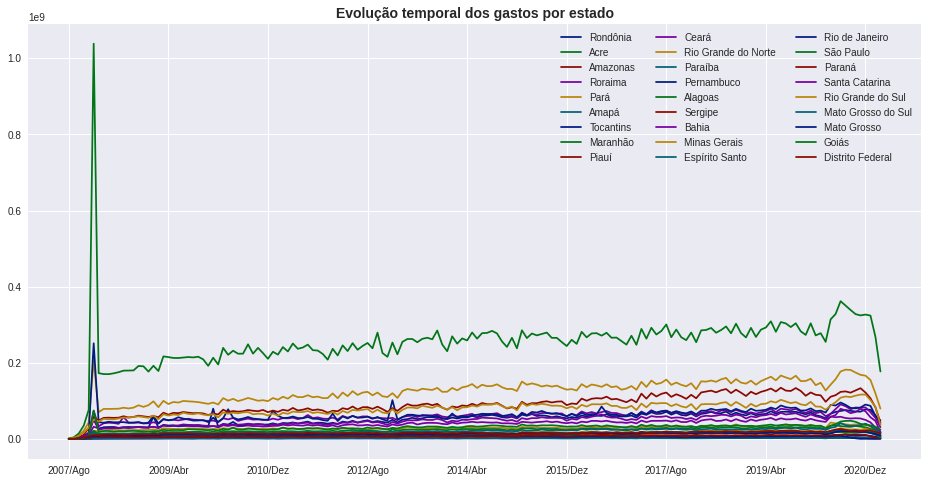

In [358]:
dados.T.plot(figsize = (16,8))
plt.style.use('seaborn-dark-palette') #Muda a paleta de cores dos gráficos (dasafio 01 da aula 03)
plt.legend(loc='upper right', ncol=3, shadow=True) #deixar a legenda mais bonita 
plt.title('Evolução temporal dos gastos por estado', fontdict = {"fontsize":14, "fontweight":"bold"})
plt.show()

Observamos que tem um outlier bem estranho no gráfico, especialmente para a linha que corresponde ao estado de São Paulo. 

In [359]:
dados.loc['São Paulo'].describe()

count             164.00
mean      252,356,909.95
std        82,622,289.80
min         1,665,349.90
25%       224,148,557.24
50%       258,052,131.35
75%       279,054,797.09
max     1,038,067,423.15
Name: São Paulo, dtype: float64

Notamos então esse valor máximo de mais de 1 bilhão, que estão bem destoante da média (aprox. 252 milhões). 

O gráfico acima, porém, está um pouco ruim, pois contém muitas informações. Vamos limpar a visualização, plotando apenas os gráficos dos cinco estados com maior média de gastos. Começamos vendo a média dos gastos de todos:

In [360]:
dados.T.mean().sort_values(ascending = False)

Unidade da Federação
São Paulo             252,356,909.95
Minas Gerais          124,501,252.85
Paraná                 89,520,374.85
Rio Grande do Sul      77,830,941.73
Rio de Janeiro         63,031,886.46
Bahia                  59,704,244.73
Pernambuco             52,322,656.51
Santa Catarina         47,773,610.09
Ceará                  40,194,056.93
Goiás                  30,326,250.00
Pará                   28,690,795.53
Maranhão               23,603,721.72
Espírito Santo         20,767,310.83
Rio Grande do Norte    16,219,913.44
Paraíba                15,944,486.74
Distrito Federal       15,806,761.24
Mato Grosso do Sul     14,173,874.23
Piauí                  13,907,773.41
Alagoas                13,636,594.34
Mato Grosso            13,293,353.95
Amazonas               11,690,518.93
Sergipe                 7,413,679.37
Tocantins               6,219,452.77
Rondônia                6,075,674.70
Acre                    2,744,190.53
Roraima                 2,005,344.83
Amapá            

Vemos então que os cinco estados com maior média de gastos são: São Paulo, Minas Gerais, Paraná, Rio Grande do Sul e Rio de Janeiro. Vamos coletar esses nomes em uma lista:

In [361]:
maiores_gastos = dados.T.mean().sort_values(ascending = False)[0:5].index.tolist()
maiores_gastos

['São Paulo', 'Minas Gerais', 'Paraná', 'Rio Grande do Sul', 'Rio de Janeiro']

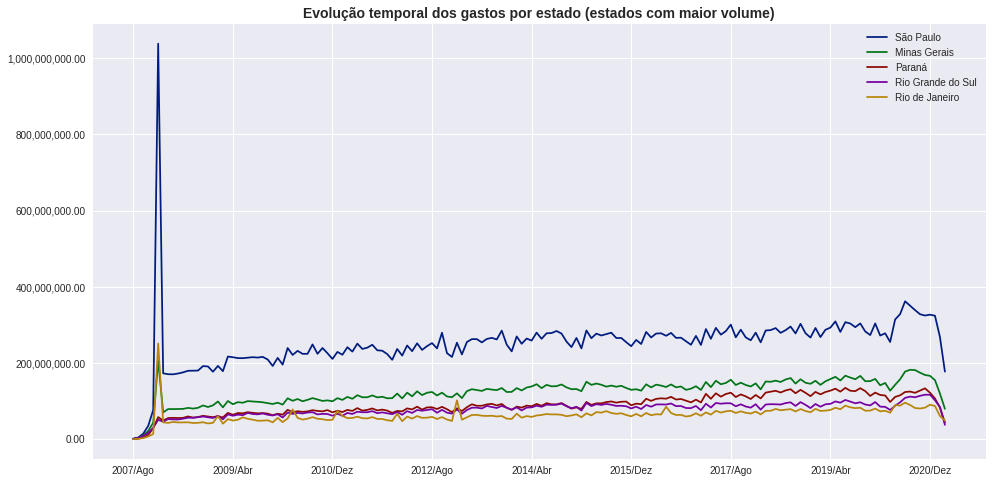

In [362]:
ax = dados.T[maiores_gastos].plot(figsize = (16,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(loc='upper right', shadow=True) 
plt.title('Evolução temporal dos gastos por estado (estados com maior volume)', fontdict = {"fontsize":14, "fontweight":"bold"})
plt.show()

Também podemos fazer um slice nos dados, para evitar incluir esse outlier no começo que está atrapalhando uma melhor visualização.

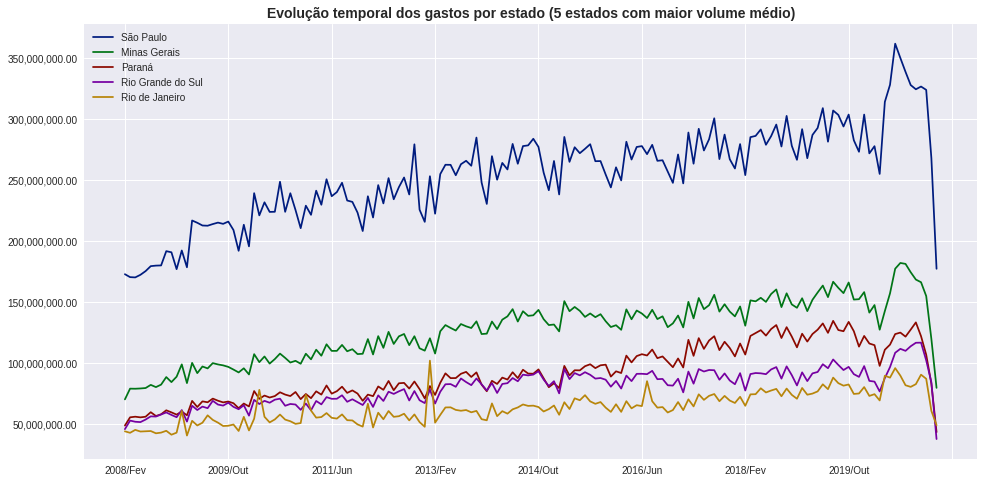

In [363]:
ax = dados.T[maiores_gastos][6:].plot(figsize = (16,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(loc='upper left', shadow=True) 
plt.title('Evolução temporal dos gastos por estado (5 estados com maior volume médio)', fontdict = {"fontsize":14, "fontweight":"bold"})
plt.show()

Visualmente, observamos que parece haver uma correlação alta entre esses valores. Vamos verificar isso numericamente:

In [364]:
dados.T[maiores_gastos].corr()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro
Unidade da Federação,,,,,
São Paulo,1.00,0.78,0.54,0.56,0.96
Minas Gerais,0.78,1.00,0.92,0.93,0.80
Paraná,0.54,0.92,1.00,0.94,0.60
Rio Grande do Sul,0.56,0.93,0.94,1.00,0.59
Rio de Janeiro,0.96,0.80,0.60,0.59,1.00


Realmente, são correlações bem altas. São Paulo e Rio de Janeiro, por exemplo ,tem uma correlação quase 1, assim como Rio Grande do Sul e Paraná e Rio Grande do Sul e Minas Gerais. Se quisermos, podemos analisar as correlações entre todos os estados. 

In [365]:
corelacao = pd.DataFrame(dados.T.corr())
corelacao

Unidade da Federação,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,Rio Grande do Norte,Paraíba,Pernambuco,Alagoas,Sergipe,Bahia,Minas Gerais,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,1.00,0.79,0.87,0.92,0.84,0.74,0.22,0.94,0.88,0.92,0.92,0.79,0.92,0.88,0.89,0.88,0.88,0.93,0.53,0.47,0.94,0.93,0.91,0.91,0.91,0.76,0.86
Acre,0.79,1.00,0.75,0.73,0.85,0.76,0.51,0.85,0.86,0.88,0.82,0.82,0.81,0.85,0.84,0.89,0.84,0.83,0.52,0.51,0.82,0.85,0.90,0.89,0.89,0.74,0.80
Amazonas,0.87,0.75,1.00,0.91,0.88,0.83,0.10,0.90,0.90,0.89,0.95,0.83,0.88,0.87,0.89,0.88,0.87,0.94,0.65,0.58,0.90,0.91,0.89,0.90,0.89,0.78,0.91
Roraima,0.92,0.73,0.91,1.00,0.85,0.77,0.10,0.91,0.88,0.86,0.92,0.81,0.88,0.85,0.87,0.85,0.84,0.92,0.54,0.47,0.93,0.89,0.87,0.88,0.88,0.71,0.91
Pará,0.84,0.85,0.88,0.85,1.00,0.90,0.44,0.93,0.94,0.96,0.91,0.93,0.86,0.93,0.92,0.92,0.88,0.87,0.60,0.56,0.91,0.90,0.91,0.94,0.93,0.77,0.92
Amapá,0.74,0.76,0.83,0.77,0.90,1.00,0.43,0.86,0.88,0.87,0.87,0.89,0.77,0.86,0.86,0.85,0.82,0.80,0.56,0.52,0.83,0.83,0.86,0.88,0.85,0.71,0.89
Tocantins,0.22,0.51,0.10,0.10,0.44,0.43,1.00,0.35,0.33,0.43,0.26,0.48,0.25,0.39,0.35,0.40,0.35,0.15,0.20,0.24,0.29,0.29,0.34,0.37,0.34,0.32,0.28
Maranhão,0.94,0.85,0.90,0.91,0.93,0.86,0.35,1.00,0.93,0.97,0.96,0.90,0.94,0.96,0.94,0.95,0.95,0.94,0.66,0.62,0.96,0.97,0.95,0.96,0.95,0.86,0.92
Piauí,0.88,0.86,0.90,0.88,0.94,0.88,0.33,0.93,1.00,0.95,0.95,0.91,0.89,0.92,0.93,0.95,0.91,0.94,0.63,0.59,0.92,0.94,0.95,0.96,0.96,0.83,0.94


Usaremos o describe() para melhor visualizar essas informações.

In [366]:
corelacao.describe()

Unidade da Federação,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,Rio Grande do Norte,Paraíba,Pernambuco,Alagoas,Sergipe,Bahia,Minas Gerais,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
count,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00
mean,0.83,0.80,0.83,0.81,0.86,0.80,0.34,0.89,0.88,0.89,0.88,0.84,0.85,0.88,0.87,0.89,0.88,0.86,0.64,0.61,0.87,0.89,0.88,0.88,0.88,0.81,0.85
std,0.17,0.12,0.17,0.18,0.13,0.13,0.17,0.14,0.14,0.13,0.16,0.11,0.15,0.12,0.14,0.12,0.12,0.17,0.15,0.16,0.16,0.14,0.15,0.15,0.15,0.12,0.15
min,0.22,0.51,0.10,0.10,0.44,0.43,0.10,0.35,0.33,0.43,0.26,0.48,0.25,0.39,0.35,0.40,0.35,0.15,0.20,0.24,0.29,0.29,0.34,0.37,0.34,0.32,0.28
25%,0.82,0.77,0.85,0.82,0.85,0.77,0.25,0.90,0.88,0.88,0.90,0.82,0.85,0.87,0.87,0.88,0.87,0.85,0.58,0.54,0.89,0.88,0.89,0.88,0.89,0.78,0.86
50%,0.88,0.83,0.89,0.87,0.91,0.85,0.34,0.94,0.92,0.93,0.94,0.88,0.90,0.92,0.91,0.93,0.92,0.92,0.62,0.57,0.93,0.94,0.93,0.93,0.93,0.82,0.90
75%,0.92,0.86,0.90,0.91,0.93,0.87,0.39,0.96,0.94,0.96,0.95,0.90,0.92,0.94,0.94,0.95,0.93,0.94,0.68,0.64,0.94,0.96,0.95,0.96,0.95,0.86,0.92
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Curioso observar que os dados do estado de Tocatins tem uma correçalão média muito baixa com os outros estados. 

#Aula 03: Manipulação de dados

No final da última sessão, vimos o gráfio da evolução dos gastos dos estados com maior média de gastos. Porém, a esta lista eu quero adcionar o estado Ceará e plotar novamente. Podemos fazer essa adição manualmente, concatenando a string. Vamos aproveitar e cortar também o valor outlier, que atrapalha a visualização.

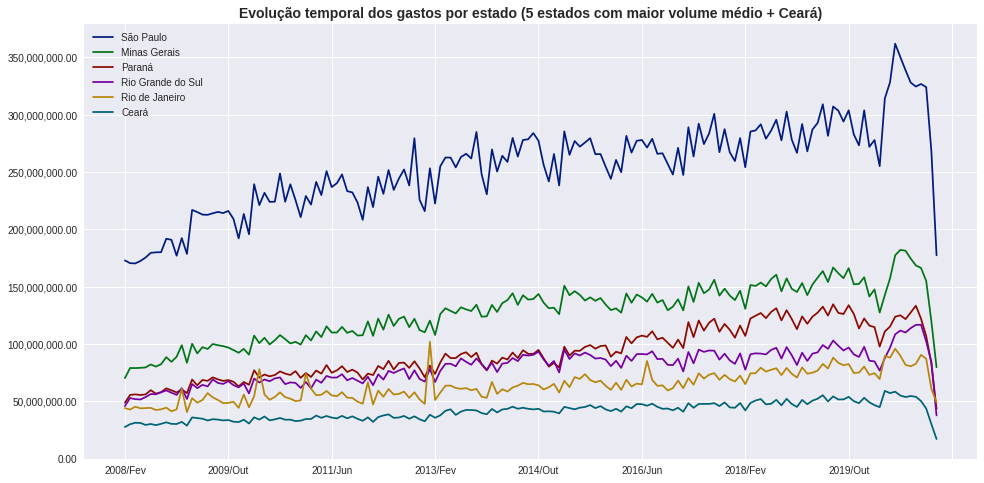

In [367]:
ax = dados.T[maiores_gastos + ['Ceará']][6:].plot(figsize = (16,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(loc='upper left', shadow=True) 
plt.title('Evolução temporal dos gastos por estado (5 estados com maior volume médio + Ceará)', fontdict = {"fontsize":14, "fontweight":"bold"})
plt.show()

Podemos também pegar uma lista aleatória de cinco estados e plotar o gráfico deles. Podemos fazer isso de várias formas. Uma delas é usar o comando sample() que retorna uma seleção aleatória de n linhas do nosso data frame:

In [368]:
dados.sample(5, random_state= 7)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Amazonas,"35,752.72","45,570.64","416,012.30","2,020,381.79","5,949,408.99","11,419,210.08","7,934,652.10","8,641,517.13","8,531,576.49","9,079,902.15","8,646,295.77","8,755,806.50","8,331,763.97","8,148,089.92","7,681,661.02","7,761,445.21","7,764,782.66","8,607,222.74","8,385,962.92","9,207,129.28","8,160,517.20","8,562,322.43","9,484,998.71","9,465,068.52","9,267,006.58","9,092,823.55","9,218,407.34","8,674,068.02","8,365,788.46","9,386,945.03","8,373,048.81","10,321,150.01","9,990,164.13","9,767,161.23","9,151,838.50","9,140,196.88","9,437,224.41","9,742,680.49","9,996,686.44","9,532,878.27",...,"13,635,186.02","14,549,450.86","12,753,555.36","14,749,409.47","14,577,930.81","15,381,061.96","14,653,650.77","15,544,595.79","16,374,961.41","15,343,340.93","16,249,963.61","14,255,408.82","14,274,053.94","15,358,914.00","14,100,074.56","16,103,971.89","16,154,491.82","16,529,976.06","15,509,984.83","16,642,220.71","16,493,719.52","15,351,607.47","16,339,427.95","14,821,977.50","14,965,815.90","15,982,353.42","15,166,470.82","14,815,958.58","16,379,386.07","19,625,325.21","18,433,057.47","19,303,743.16","18,687,233.58","18,628,627.49","18,728,251.20","20,451,573.77","21,546,059.48","24,439,059.57","13,679,358.06","6,799,060.80"
Ceará,"357,904.65","572,356.18","1,865,065.71","5,131,814.39","10,798,042.86","32,444,328.54","27,643,304.86","30,085,370.22","31,376,221.00","31,189,904.62","29,463,965.11","30,302,691.99","29,304,821.51","30,435,026.82","31,741,382.87","30,415,959.60","30,263,904.48","32,123,065.16","28,875,478.53","36,018,826.32","35,445,605.90","34,894,016.82","33,399,345.34","34,459,796.32","34,129,887.37","33,410,351.78","33,743,129.25","32,285,582.67","31,981,440.73","34,001,962.62","30,730,683.21","36,109,330.17","34,139,573.93","36,838,614.26","33,486,379.49","34,320,454.26","35,533,813.82","34,034,162.50","34,092,124.70","32,807,749.83",...,"44,452,653.04","48,586,284.74","42,120,360.66","48,637,258.49","50,805,625.71","51,998,581.31","47,406,805.41","47,916,557.96","51,376,446.25","46,560,335.78","52,227,057.03","47,717,852.54","45,194,615.82","51,302,833.45","47,533,935.93","50,654,425.80","52,336,204.61","55,381,997.05","49,997,697.54","54,340,019.60","51,672,585.01","51,750,791.62","53,952,404.24","50,215,470.13","48,450,464.27","53,141,363.31","49,234,260.33","46,718,050.22","44,956,286.28","59,152,597.50","57,225,862.97","58,448,488.85","55,118,185.83","53,827,491.88","54,679,652.99","54,026,288.42","50,271,552.33","43,743,425.74","30,186,951.00","17,173,151.55"
Acre,"10,470.07","14,001.71","86,200.85","301,323.68","769,612.36","1,731,744.62","1,743,978.66","2,057,439.02","2,057,829.69","2,226,577.93","2,112,576.82","2,029,128.01","1,886,871.84","2,084,884.80","2,230,838.45","2,122,013.12","2,196,651.69","2,152,239.30","2,086,775.61","2,476,364.26","2,396,887.63","2,610,261.80","2,174,098.10","2,051,885.16","1,714,707.91","1,341,532.34","2,288,458.90","2,462,712.79","2,254,900.20","2,381,535.93","2,079,981.05","2,564,837.77","2,588,318.06","2,538,525.67","2,319,786.41","2,279,156.60","2,454,599.37","2,578,923.75","2,625,443.29","2,512,995.15",...,"2,638,773.92","2,968,168.75","2,769,797.39","3,0

O parâmetro random_state fixa a semente de aleatoriadade, logo o resultado sempre será o mesmo, quando rodar o código. Sem esse parâmetro, a seleção mudaria a cada vez que o código fosse executado. 
Vamos agora plotar o gráfico:

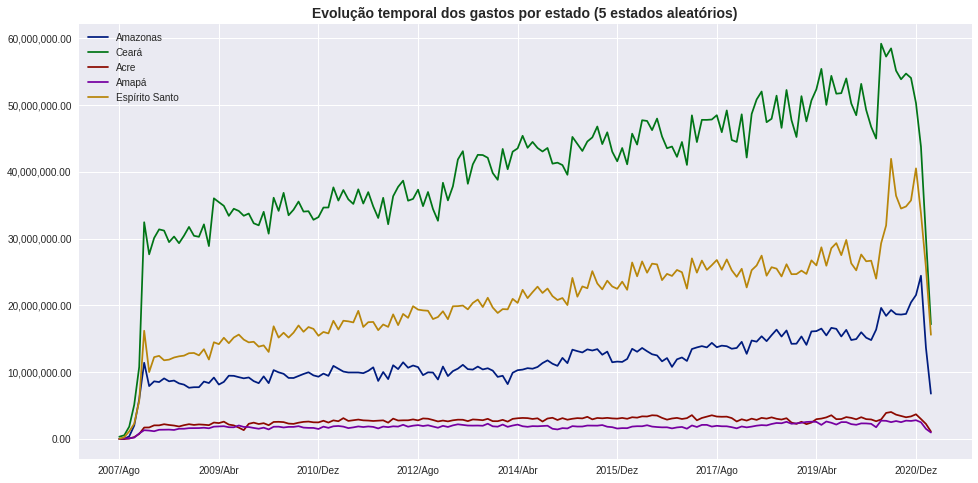

In [369]:
ax = dados.sample(5, random_state= 7).T.plot(figsize = (16,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(loc='upper left', shadow=True) 
plt.title('Evolução temporal dos gastos por estado (5 estados aleatórios)', fontdict = {"fontsize":14, "fontweight":"bold"})
plt.show()

Também é possível usar um comando da biblioteca Numpy para definir uma semente aleatória.

In [370]:
np.random.seed(7)
dados.sample(5)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Amazonas,"35,752.72","45,570.64","416,012.30","2,020,381.79","5,949,408.99","11,419,210.08","7,934,652.10","8,641,517.13","8,531,576.49","9,079,902.15","8,646,295.77","8,755,806.50","8,331,763.97","8,148,089.92","7,681,661.02","7,761,445.21","7,764,782.66","8,607,222.74","8,385,962.92","9,207,129.28","8,160,517.20","8,562,322.43","9,484,998.71","9,465,068.52","9,267,006.58","9,092,823.55","9,218,407.34","8,674,068.02","8,365,788.46","9,386,945.03","8,373,048.81","10,321,150.01","9,990,164.13","9,767,161.23","9,151,838.50","9,140,196.88","9,437,224.41","9,742,680.49","9,996,686.44","9,532,878.27",...,"13,635,186.02","14,549,450.86","12,753,555.36","14,749,409.47","14,577,930.81","15,381,061.96","14,653,650.77","15,544,595.79","16,374,961.41","15,343,340.93","16,249,963.61","14,255,408.82","14,274,053.94","15,358,914.00","14,100,074.56","16,103,971.89","16,154,491.82","16,529,976.06","15,509,984.83","16,642,220.71","16,493,719.52","15,351,607.47","16,339,427.95","14,821,977.50","14,965,815.90","15,982,353.42","15,166,470.82","14,815,958.58","16,379,386.07","19,625,325.21","18,433,057.47","19,303,743.16","18,687,233.58","18,628,627.49","18,728,251.20","20,451,573.77","21,546,059.48","24,439,059.57","13,679,358.06","6,799,060.80"
Ceará,"357,904.65","572,356.18","1,865,065.71","5,131,814.39","10,798,042.86","32,444,328.54","27,643,304.86","30,085,370.22","31,376,221.00","31,189,904.62","29,463,965.11","30,302,691.99","29,304,821.51","30,435,026.82","31,741,382.87","30,415,959.60","30,263,904.48","32,123,065.16","28,875,478.53","36,018,826.32","35,445,605.90","34,894,016.82","33,399,345.34","34,459,796.32","34,129,887.37","33,410,351.78","33,743,129.25","32,285,582.67","31,981,440.73","34,001,962.62","30,730,683.21","36,109,330.17","34,139,573.93","36,838,614.26","33,486,379.49","34,320,454.26","35,533,813.82","34,034,162.50","34,092,124.70","32,807,749.83",...,"44,452,653.04","48,586,284.74","42,120,360.66","48,637,258.49","50,805,625.71","51,998,581.31","47,406,805.41","47,916,557.96","51,376,446.25","46,560,335.78","52,227,057.03","47,717,852.54","45,194,615.82","51,302,833.45","47,533,935.93","50,654,425.80","52,336,204.61","55,381,997.05","49,997,697.54","54,340,019.60","51,672,585.01","51,750,791.62","53,952,404.24","50,215,470.13","48,450,464.27","53,141,363.31","49,234,260.33","46,718,050.22","44,956,286.28","59,152,597.50","57,225,862.97","58,448,488.85","55,118,185.83","53,827,491.88","54,679,652.99","54,026,288.42","50,271,552.33","43,743,425.74","30,186,951.00","17,173,151.55"
Acre,"10,470.07","14,001.71","86,200.85","301,323.68","769,612.36","1,731,744.62","1,743,978.66","2,057,439.02","2,057,829.69","2,226,577.93","2,112,576.82","2,029,128.01","1,886,871.84","2,084,884.80","2,230,838.45","2,122,013.12","2,196,651.69","2,152,239.30","2,086,775.61","2,476,364.26","2,396,887.63","2,610,261.80","2,174,098.10","2,051,885.16","1,714,707.91","1,341,532.34","2,288,458.90","2,462,712.79","2,254,900.20","2,381,535.93","2,079,981.05","2,564,837.77","2,588,318.06","2,538,525.67","2,319,786.41","2,279,156.60","2,454,599.37","2,578,923.75","2,625,443.29","2,512,995.15",...,"2,638,773.92","2,968,168.75","2,769,797.39","3,0

Obtivemos, obivamente, a mesma seleção aleatória. Mas esse comando age apenas naquela célula onde está escrito. Veja:

In [371]:
dados.sample(5)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Paraná,"554,800.22","1,431,708.01","4,630,402.44","11,120,030.79","28,790,722.87","58,081,334.45","48,855,046.46","55,611,791.07","56,115,135.82","55,574,831.93","56,094,754.74","59,802,402.07","56,699,001.13","58,091,985.79","61,365,941.22","59,667,208.62","57,816,197.74","60,381,593.99","57,239,101.63","69,070,488.20","64,054,678.26","68,685,542.95","67,931,227.06","70,958,762.64","69,225,783.96","67,849,968.52","68,558,209.28","67,158,496.97","63,094,274.28","66,902,643.63","64,501,133.64","77,138,870.60","70,755,396.99","73,456,756.71","71,839,020.89","73,013,830.77","76,151,006.95","74,240,963.45","73,042,386.70","76,364,750.27",...,"105,558,123.29","116,133,193.49","107,075,982.24","122,331,354.51","124,731,345.17","127,083,090.02","122,616,924.02","127,991,900.80","131,257,163.40","120,647,377.43","129,530,163.96","121,810,669.26","112,984,630.73","124,159,239.68","117,715,473.32","123,907,372.22","127,464,502.39","132,608,039.80","124,865,873.14","134,708,659.18","127,174,381.95","126,203,976.57","133,870,601.68","126,221,140.81","113,573,832.72","122,330,101.96","116,125,740.39","114,776,571.27","97,784,060.57","111,012,770.38","115,203,716.64","123,856,640.55","125,089,468.62","121,771,167.11","127,506,086.52","133,443,307.36","122,146,256.92","106,948,897.53","83,130,175.37","43,480,729.07"
Rio de Janeiro,"469,469.34","921,646.57","2,994,664.57","7,250,528.08","13,627,123.27","251,511,992.03","44,128,159.73","42,900,847.02","45,306,499.53","43,951,349.46","44,111,107.27","44,359,056.71","42,500,830.29","43,066,461.47","44,553,314.55","41,351,511.51","43,024,756.36","60,885,459.85","40,668,378.23","52,753,544.47","48,916,675.76","51,177,398.60","57,241,944.15","53,485,657.68","51,244,087.82","48,489,476.33","48,689,069.43","49,708,372.48","44,413,423.34","55,993,709.91","44,833,345.11","54,473,238.33","78,128,632.98","56,028,875.32","51,435,826.33","53,873,907.49","57,867,285.17","53,736,019.37","52,379,338.55","50,242,531.67",...,"67,378,799.43","72,453,040.87","65,060,331.66","74,428,736.76","74,579,184.72","79,419,042.03","75,991,764.07","77,576,014.21","78,916,904.64","72,869,420.27","79,188,399.76","74,018,397.83","70,831,514.10","79,663,329.44","74,142,875.38","75,063,150.71","76,859,575.91","82,670,993.34","78,689,231.48","88,182,408.00","83,624,113.30","81,561,944.39","82,534,679.94","74,778,468.98","75,149,065.87","80,411,863.59","73,147,214.02","74,595,986.00","69,437,941.81","89,725,279.21","88,135,690.57","95,941,141.03","89,795,469.41","81,886,688.22","80,570,244.20","82,807,309.85","90,567,351.87","87,201,907.99","60,873,103.08","49,149,884.48"
Amapá,"33,672.74","104,822.98","118,378.28","226,661.18","844,019.90","1,329,876.61","1,275,063.72","1,177,745.93","1,396,371.51","1,411,520.77","1,420,892.01","1,367,235.47","1,550,340.63","1,550,166.99","1,635,676.50","1,647,903.31","1,649,380.76","1,702,307.43","1,617,603.91","1,863,376.50","1,899,215.36","1,929,012.06","1,776,155.94","1,765,731.76","2,038,762.73","1,820,033.62","1,806,092.38","1,669,318.82","1,551,083.36","1,713,037.45","1,448,489.25","1,850,181.41","1,860,225.48","1,739,371.09","1,826,492.45","1,827,433.46","1,933,782.60","1,721,2

Sem um commando para fixar a seed, cada vez que o código for executado, será retornado um valor diferente. 

Observe que no data set original, nos nomes das unidades federativas estavam acompanhados de um número. Esse número na verdade era um indicativo da região ao qual pertencia o estado. Vamos importar novamente o data set:

In [372]:
df = pd.read_csv("/content/A184117189_28_143_208.csv", encoding="ISO-8859-1", 
                    skiprows = 3, sep=";", skipfooter=12,
                    thousands=".", decimal=",")
df

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"8,457,455.71","7,766,983.20","8,858,845.57","8,407,076.44","9,492,938.92","8,206,195.92","9,011,612.58","9,124,967.84","8,406,732.72","8,411,360.02","8,651,081.66","8,193,425.99","8,388,269.45","8,645,315.78","9,050,329.13","9,211,262.51","9,490,545.02","8,600,886.20","8,919,190.86","8,909,111.89","8,409,386.09","8,924,348.41","8,948,605.66","8,660,753.05","8,327,665.97","8,431,334.62","7,251,287.20","7,490,440.60","8,957,706.45","10,993,332.84","10,479,989.36","11,433,467.56","8,876,900.39","8,167,253.19","8,759,013.71","9,003,402.23","8,414,690.60","6,039,419.59","4,732,441.04","996,411,254.68"
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"2,968,168.75","2,769,797.39","3,057,631.96","2,874,965.31","3,175,575.17","3,060,903.21","3,253,011.61","3,040,645.05","2,926,179.27","3,126,120.64","2,473,454.85","2,277,493.49","2,594,347.32","2,234,388.36","2,473,008.49","2,979,764.77","3,070,533.95","3,249,052.69","3,567,538.64","2,981,072.98","2,998,860.31","3,293,378.97","3,174,249.43","2,959,569.09","3,276,790.55","2,985,763.71","2,939,675.20","2,672,857.33","2,940,827.86","3,914,823.86","4,053,085.41","3,658,265.59","3,470,409.45","3,267,918.69","3,393,958.27","3,711,660.71","3,005,561.16","2,272,733.90","1,137,341.65","450,048,530.47"
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"14,549,450.86","12,753,555.36","14,749,409.47","14,577,930.81","15,381,061.96","14,653,650.77","15,544,595.79","16,374,961.41","15,343,340.93","16,249,963.61","14,255,408.82","14,274,053.94","15,358,914.00","14,100,074.56","16,103,971.89","16,154,491.82","16,529,976.06","15,509,984.83","16,642,220.71","16,493,719.52","15,351,607.47","16,339,427.95","14,821,977.50","14,965,815.90","15,982,353.42","15,166,470.82","14,815,958.58","16,379,386.07","19,625,325.21","18,433,057.47","19,303,743.16","18,687,233.58","18,628,627.49","18,728,251.20","20,451,573.77","21,546,059.48","24,439,059.57","13,679,358.06","6,799,060.80","1,917,247,936.05"
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"2,740,952.07","2,478,349.44","2,674,958.94","2,721,261.19","2,844,811.66","2,967,161.35","2,841,587.97","3,328,230.63","2,878,691.04","2,964,324.32","2,524,712.40","2,462,451.64","2,662,240.18","2,499,996.16","2,846,135.56","2,789,823.29","2,839,389.53","2,647,540.20","2,865,777.71","3,181,321.82","3,070,436.96","3,162,342.44","3,121,104.71","2,889,969.87","3,084,561.08","2,967,159.04","2,813,954.05","2,306,119.95","2,921,522.16","3,300,012.98","3,192,075.41","3,262,354.34","2,978,629.22","3,313,296.78","3,527,263.23","3,125,021.90","3,209,323.68","3,044,798.77","2,381,844.31","328,876,965.09"
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"33,615,836.09","30,623,491.62","34,121,931.00","35,039,954.20","35,424,611.06","34,160,283.18","34,484,949.49","35,618,364.04","34,380,916.90","38,441,090.50","33,583,538.08","32,789,354.87","34,513,534.80","31,885,919.67","33,236,155.79","31,008,924.95","31,064,106.50","28,543,179.30","36,713,929.36","36,462,011.47","36,792,954.02","36,984,

Observamos então o seguinte padrão:
- Estados da região Norte -----------> começam com 1
- Estados da região Nordeste --------> começam com 2
- Estados da região Sudeste ---------> começam com 3
- Estados da região Sul -------------> começam com 4
- Estados da região Centro-Oeste ----> começam com 5

Podemos usar isso para criar uma nova coluna, com a informação da região na qual o estado pertence. Primeiro, criamos uma lista com os nomes das regiões, na ordem listada acima:

In [373]:
lista_regioes = ['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste']
lista_regioes

['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste']

In [374]:
coluna_regioes = []
for i in range(0,df.shape[0]):
  dig = int(df['Unidade da Federação'][i][0])
  coluna_regioes.append(lista_regioes[dig-1])
df['Região'] = coluna_regioes
df

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total,Região
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"7,766,983.20","8,858,845.57","8,407,076.44","9,492,938.92","8,206,195.92","9,011,612.58","9,124,967.84","8,406,732.72","8,411,360.02","8,651,081.66","8,193,425.99","8,388,269.45","8,645,315.78","9,050,329.13","9,211,262.51","9,490,545.02","8,600,886.20","8,919,190.86","8,909,111.89","8,409,386.09","8,924,348.41","8,948,605.66","8,660,753.05","8,327,665.97","8,431,334.62","7,251,287.20","7,490,440.60","8,957,706.45","10,993,332.84","10,479,989.36","11,433,467.56","8,876,900.39","8,167,253.19","8,759,013.71","9,003,402.23","8,414,690.60","6,039,419.59","4,732,441.04","996,411,254.68",Norte
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"2,769,797.39","3,057,631.96","2,874,965.31","3,175,575.17","3,060,903.21","3,253,011.61","3,040,645.05","2,926,179.27","3,126,120.64","2,473,454.85","2,277,493.49","2,594,347.32","2,234,388.36","2,473,008.49","2,979,764.77","3,070,533.95","3,249,052.69","3,567,538.64","2,981,072.98","2,998,860.31","3,293,378.97","3,174,249.43","2,959,569.09","3,276,790.55","2,985,763.71","2,939,675.20","2,672,857.33","2,940,827.86","3,914,823.86","4,053,085.41","3,658,265.59","3,470,409.45","3,267,918.69","3,393,958.27","3,711,660.71","3,005,561.16","2,272,733.90","1,137,341.65","450,048,530.47",Norte
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"12,753,555.36","14,749,409.47","14,577,930.81","15,381,061.96","14,653,650.77","15,544,595.79","16,374,961.41","15,343,340.93","16,249,963.61","14,255,408.82","14,274,053.94","15,358,914.00","14,100,074.56","16,103,971.89","16,154,491.82","16,529,976.06","15,509,984.83","16,642,220.71","16,493,719.52","15,351,607.47","16,339,427.95","14,821,977.50","14,965,815.90","15,982,353.42","15,166,470.82","14,815,958.58","16,379,386.07","19,625,325.21","18,433,057.47","19,303,743.16","18,687,233.58","18,628,627.49","18,728,251.20","20,451,573.77","21,546,059.48","24,439,059.57","13,679,358.06","6,799,060.80","1,917,247,936.05",Norte
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"2,478,349.44","2,674,958.94","2,721,261.19","2,844,811.66","2,967,161.35","2,841,587.97","3,328,230.63","2,878,691.04","2,964,324.32","2,524,712.40","2,462,451.64","2,662,240.18","2,499,996.16","2,846,135.56","2,789,823.29","2,839,389.53","2,647,540.20","2,865,777.71","3,181,321.82","3,070,436.96","3,162,342.44","3,121,104.71","2,889,969.87","3,084,561.08","2,967,159.04","2,813,954.05","2,306,119.95","2,921,522.16","3,300,012.98","3,192,075.41","3,262,354.34","2,978,629.22","3,313,296.78","3,527,263.23","3,125,021.90","3,209,323.68","3,044,798.77","2,381,844.31","328,876,965.09",Norte
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"30,623,491.62","34,121,931.00","35,039,954.20","35,424,611.06","34,160,283.18","34,484,949.49","35,618,364.04","34,380,916.90","38,441,090.50","33,583,538.08","32,789,354.87","34,513,534.80","31,885,919.67","33,236,155.79","31,008,924.95","31,064,106.50","28,543,179.30","36,713,929.36","36,462,011.47","36,792,954.02","36,984,314.60","35,579,251.49","35,247,659.30","37,046,350.76"

Agora podemos aplicar o procedimento feito na aula 01 e limpar esses dígitos dos nomes dos estados. 

In [375]:
df['Unidade da Federação'] = df['Unidade da Federação'].str.slice(3,)
df

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total,Região
0,Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"7,766,983.20","8,858,845.57","8,407,076.44","9,492,938.92","8,206,195.92","9,011,612.58","9,124,967.84","8,406,732.72","8,411,360.02","8,651,081.66","8,193,425.99","8,388,269.45","8,645,315.78","9,050,329.13","9,211,262.51","9,490,545.02","8,600,886.20","8,919,190.86","8,909,111.89","8,409,386.09","8,924,348.41","8,948,605.66","8,660,753.05","8,327,665.97","8,431,334.62","7,251,287.20","7,490,440.60","8,957,706.45","10,993,332.84","10,479,989.36","11,433,467.56","8,876,900.39","8,167,253.19","8,759,013.71","9,003,402.23","8,414,690.60","6,039,419.59","4,732,441.04","996,411,254.68",Norte
1,Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"2,769,797.39","3,057,631.96","2,874,965.31","3,175,575.17","3,060,903.21","3,253,011.61","3,040,645.05","2,926,179.27","3,126,120.64","2,473,454.85","2,277,493.49","2,594,347.32","2,234,388.36","2,473,008.49","2,979,764.77","3,070,533.95","3,249,052.69","3,567,538.64","2,981,072.98","2,998,860.31","3,293,378.97","3,174,249.43","2,959,569.09","3,276,790.55","2,985,763.71","2,939,675.20","2,672,857.33","2,940,827.86","3,914,823.86","4,053,085.41","3,658,265.59","3,470,409.45","3,267,918.69","3,393,958.27","3,711,660.71","3,005,561.16","2,272,733.90","1,137,341.65","450,048,530.47",Norte
2,Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"12,753,555.36","14,749,409.47","14,577,930.81","15,381,061.96","14,653,650.77","15,544,595.79","16,374,961.41","15,343,340.93","16,249,963.61","14,255,408.82","14,274,053.94","15,358,914.00","14,100,074.56","16,103,971.89","16,154,491.82","16,529,976.06","15,509,984.83","16,642,220.71","16,493,719.52","15,351,607.47","16,339,427.95","14,821,977.50","14,965,815.90","15,982,353.42","15,166,470.82","14,815,958.58","16,379,386.07","19,625,325.21","18,433,057.47","19,303,743.16","18,687,233.58","18,628,627.49","18,728,251.20","20,451,573.77","21,546,059.48","24,439,059.57","13,679,358.06","6,799,060.80","1,917,247,936.05",Norte
3,Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"2,478,349.44","2,674,958.94","2,721,261.19","2,844,811.66","2,967,161.35","2,841,587.97","3,328,230.63","2,878,691.04","2,964,324.32","2,524,712.40","2,462,451.64","2,662,240.18","2,499,996.16","2,846,135.56","2,789,823.29","2,839,389.53","2,647,540.20","2,865,777.71","3,181,321.82","3,070,436.96","3,162,342.44","3,121,104.71","2,889,969.87","3,084,561.08","2,967,159.04","2,813,954.05","2,306,119.95","2,921,522.16","3,300,012.98","3,192,075.41","3,262,354.34","2,978,629.22","3,313,296.78","3,527,263.23","3,125,021.90","3,209,323.68","3,044,798.77","2,381,844.31","328,876,965.09",Norte
4,Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"30,623,491.62","34,121,931.00","35,039,954.20","35,424,611.06","34,160,283.18","34,484,949.49","35,618,364.04","34,380,916.90","38,441,090.50","33,583,538.08","32,789,354.87","34,513,534.80","31,885,919.67","33,236,155.79","31,008,924.95","31,064,106.50","28,543,179.30","36,713,929.36","36,462,011.47","36,792,954.02","36,984,314.60","35,579,251.49","35,247,659.30","37,046,350.76","34,683,341.17

E podemos utilizar apenas as colunas com dados usáveis, como fizemos acima. Mas antes, vamos salvar uma cópia do dataframe, pois iremos utilizar em uma análise posterior:

In [376]:
df_original = df

In [377]:
dados_usaveis = df[['Região'] + colunas_usaveis]
dados_usaveis

,Região,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,Norte,Rondônia,"4,209.37","16,397.03","133,645.19","346,912.84","711,758.31","1,829,559.71","1,940,792.63","1,955,721.68","2,143,353.81","2,280,382.58","2,624,542.97","2,973,421.02","2,938,286.29","2,843,930.91","2,878,153.20","2,780,022.62","2,651,804.89","3,147,566.24","3,082,108.12","4,190,355.33","4,040,251.62","3,946,423.71","3,372,377.96","3,720,608.86","3,787,323.26","3,679,369.94","3,866,146.99","3,667,808.60","3,633,471.79","3,812,315.59","3,911,776.03","4,663,060.75","4,524,544.88","4,778,755.26","4,369,733.23","4,632,439.12","4,464,307.47","4,668,642.02",...,"8,457,455.71","7,766,983.20","8,858,845.57","8,407,076.44","9,492,938.92","8,206,195.92","9,011,612.58","9,124,967.84","8,406,732.72","8,411,360.02","8,651,081.66","8,193,425.99","8,388,269.45","8,645,315.78","9,050,329.13","9,211,262.51","9,490,545.02","8,600,886.20","8,919,190.86","8,909,111.89","8,409,386.09","8,924,348.41","8,948,605.66","8,660,753.05","8,327,665.97","8,431,334.62","7,251,287.20","7,490,440.60","8,957,706.45","10,993,332.84","10,479,989.36","11,433,467.56","8,876,900.39","8,167,253.19","8,759,013.71","9,003,402.23","8,414,690.60","6,039,419.59","4,732,441.04","996,411,254.68"
1,Norte,Acre,"10,470.07","14,001.71","86,200.85","301,323.68","769,612.36","1,731,744.62","1,743,978.66","2,057,439.02","2,057,829.69","2,226,577.93","2,112,576.82","2,029,128.01","1,886,871.84","2,084,884.80","2,230,838.45","2,122,013.12","2,196,651.69","2,152,239.30","2,086,775.61","2,476,364.26","2,396,887.63","2,610,261.80","2,174,098.10","2,051,885.16","1,714,707.91","1,341,532.34","2,288,458.90","2,462,712.79","2,254,900.20","2,381,535.93","2,079,981.05","2,564,837.77","2,588,318.06","2,538,525.67","2,319,786.41","2,279,156.60","2,454,599.37","2,578,923.75",...,"2,968,168.75","2,769,797.39","3,057,631.96","2,874,965.31","3,175,575.17","3,060,903.21","3,253,011.61","3,040,645.05","2,926,179.27","3,126,120.64","2,473,454.85","2,277,493.49","2,594,347.32","2,234,388.36","2,473,008.49","2,979,764.77","3,070,533.95","3,249,052.69","3,567,538.64","2,981,072.98","2,998,860.31","3,293,378.97","3,174,249.43","2,959,569.09","3,276,790.55","2,985,763.71","2,939,675.20","2,672,857.33","2,940,827.86","3,914,823.86","4,053,085.41","3,658,265.59","3,470,409.45","3,267,918.69","3,393,958.27","3,711,660.71","3,005,561.16","2,272,733.90","1,137,341.65","450,048,530.47"
2,Norte,Amazonas,"35,752.72","45,570.64","416,012.30","2,020,381.79","5,949,408.99","11,419,210.08","7,934,652.10","8,641,517.13","8,531,576.49","9,079,902.15","8,646,295.77","8,755,806.50","8,331,763.97","8,148,089.92","7,681,661.02","7,761,445.21","7,764,782.66","8,607,222.74","8,385,962.92","9,207,129.28","8,160,517.20","8,562,322.43","9,484,998.71","9,465,068.52","9,267,006.58","9,092,823.55","9,218,407.34","8,674,068.02","8,365,788.46","9,386,945.03","8,373,048.81","10,321,150.01","9,990,164.13","9,767,161.23","9,151,838.50","9,140,196.88","9,437,224.41","9,742,680.49",...,"14,549,450.86","12,753,555.36","14,749,409.47","14,577,930.81","15,381,061.96","14,653,650.77","15,544,595.79","16,374,961.41","15,343,340.93","16,249,963.61","14,255,408.82","14,274,053.94","15,358,914.00","14,100,074.56","16,103,971.89","16,154,491.82","16,529,976.06","15,509,984.83","16,642,220.71","16,493,719.52","15,

Podemos definiar a Unidadade da Federação como índice:

In [378]:
dados_usaveis= dados_usaveis.set_index('Unidade da Federação')
dados_usaveis

,Região,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,Norte,"4,209.37","16,397.03","133,645.19","346,912.84","711,758.31","1,829,559.71","1,940,792.63","1,955,721.68","2,143,353.81","2,280,382.58","2,624,542.97","2,973,421.02","2,938,286.29","2,843,930.91","2,878,153.20","2,780,022.62","2,651,804.89","3,147,566.24","3,082,108.12","4,190,355.33","4,040,251.62","3,946,423.71","3,372,377.96","3,720,608.86","3,787,323.26","3,679,369.94","3,866,146.99","3,667,808.60","3,633,471.79","3,812,315.59","3,911,776.03","4,663,060.75","4,524,544.88","4,778,755.26","4,369,733.23","4,632,439.12","4,464,307.47","4,668,642.02","4,490,368.23",...,"8,457,455.71","7,766,983.20","8,858,845.57","8,407,076.44","9,492,938.92","8,206,195.92","9,011,612.58","9,124,967.84","8,406,732.72","8,411,360.02","8,651,081.66","8,193,425.99","8,388,269.45","8,645,315.78","9,050,329.13","9,211,262.51","9,490,545.02","8,600,886.20","8,919,190.86","8,909,111.89","8,409,386.09","8,924,348.41","8,948,605.66","8,660,753.05","8,327,665.97","8,431,334.62","7,251,287.20","7,490,440.60","8,957,706.45","10,993,332.84","10,479,989.36","11,433,467.56","8,876,900.39","8,167,253.19","8,759,013.71","9,003,402.23","8,414,690.60","6,039,419.59","4,732,441.04","996,411,254.68"
Acre,Norte,"10,470.07","14,001.71","86,200.85","301,323.68","769,612.36","1,731,744.62","1,743,978.66","2,057,439.02","2,057,829.69","2,226,577.93","2,112,576.82","2,029,128.01","1,886,871.84","2,084,884.80","2,230,838.45","2,122,013.12","2,196,651.69","2,152,239.30","2,086,775.61","2,476,364.26","2,396,887.63","2,610,261.80","2,174,098.10","2,051,885.16","1,714,707.91","1,341,532.34","2,288,458.90","2,462,712.79","2,254,900.20","2,381,535.93","2,079,981.05","2,564,837.77","2,588,318.06","2,538,525.67","2,319,786.41","2,279,156.60","2,454,599.37","2,578,923.75","2,625,443.29",...,"2,968,168.75","2,769,797.39","3,057,631.96","2,874,965.31","3,175,575.17","3,060,903.21","3,253,011.61","3,040,645.05","2,926,179.27","3,126,120.64","2,473,454.85","2,277,493.49","2,594,347.32","2,234,388.36","2,473,008.49","2,979,764.77","3,070,533.95","3,249,052.69","3,567,538.64","2,981,072.98","2,998,860.31","3,293,378.97","3,174,249.43","2,959,569.09","3,276,790.55","2,985,763.71","2,939,675.20","2,672,857.33","2,940,827.86","3,914,823.86","4,053,085.41","3,658,265.59","3,470,409.45","3,267,918.69","3,393,958.27","3,711,660.71","3,005,561.16","2,272,733.90","1,137,341.65","450,048,530.47"
Amazonas,Norte,"35,752.72","45,570.64","416,012.30","2,020,381.79","5,949,408.99","11,419,210.08","7,934,652.10","8,641,517.13","8,531,576.49","9,079,902.15","8,646,295.77","8,755,806.50","8,331,763.97","8,148,089.92","7,681,661.02","7,761,445.21","7,764,782.66","8,607,222.74","8,385,962.92","9,207,129.28","8,160,517.20","8,562,322.43","9,484,998.71","9,465,068.52","9,267,006.58","9,092,823.55","9,218,407.34","8,674,068.02","8,365,788.46","9,386,945.03","8,373,048.81","10,321,150.01","9,990,164.13","9,767,161.23","9,151,838.50","9,140,196.88","9,437,224.41","9,742,680.49","9,996,686.44",...,"14,549,450.86","12,753,555.36","14,749,409.47","14,577,930.81","15,381,061.96","14,653,650.77","15,544,595.79","16,374,961.41","15,343,340.93","16,249,963.61","14,255,408.82","14,274,053.94","15

Agora que temos uma coluna que nos informa a região, é mais fácil aplicar filtros por região. Por exemplo, suponha que queremos visualizar as evoluções temporais dos gastos apenas dos estados do Nordeste. Assim:

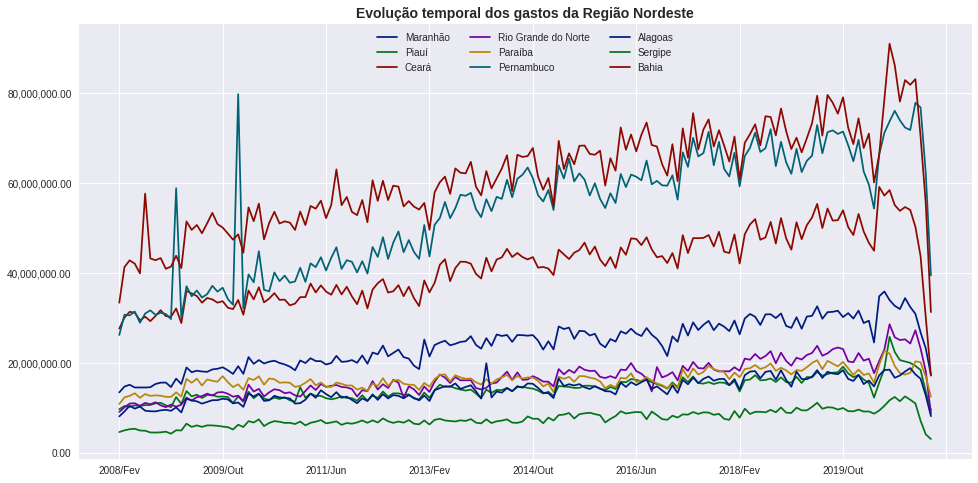

In [379]:
ax = dados_usaveis[dados_usaveis['Região'] == 'Nordeste'].drop('Total', axis = 1).T[7:].plot(figsize = (16,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(loc='upper center', shadow=True, ncol = 3) 
plt.title('Evolução temporal dos gastos da Região Nordeste', fontdict = {"fontsize":14, "fontweight":"bold"})
plt.show()

Podemos fazer o mesmo para a região Sudeste:

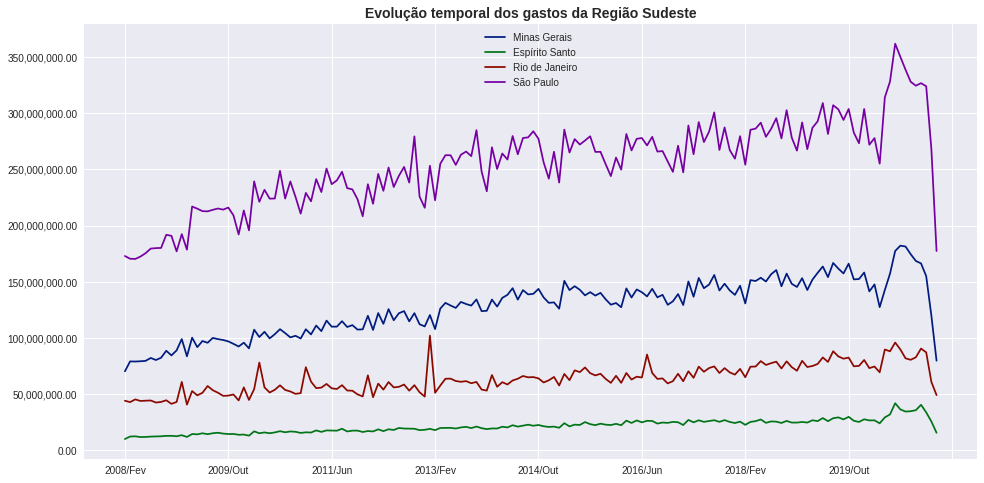

In [380]:
ax = dados_usaveis[dados_usaveis['Região'] == 'Sudeste'].drop('Total', axis = 1).T[7:].plot(figsize = (16,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(loc='upper center', shadow=True) 
plt.title('Evolução temporal dos gastos da Região Sudeste', fontdict = {"fontsize":14, "fontweight":"bold"})
plt.show()

Observe que estamos considerando apenas os dados após Janeiro de 2008, devido ao valor estranho que já comentamos na aula 02. Uma possível explicação para esse valor é que Janeiro de 2008 foi exatamente quando os dados começaram a ser coletados. É possível então que uma quantidade enorme de dados para os quais não se sabia a data do atendimento forma rotulados como 2008/Jan, mas de fato o atendimento aconteceu antes desse período.

## Casos de dengue

No desafio 05 proposto na aula 03, nos foi pedido para buscar informações sobre os casos de dengue no Brasil e tentar relacionar com os picos de gasto com receita hospitalar vistos nos gráficos acima. 
Para isso, coletei no próprio site do DATASUS informações sobre internações devido a procedimentos relacionados à dengue, no período de Ago/2008 à Mar/2021. Vamos importar o arquivo csv e gerar o data frame:

In [381]:
dados_dengue = pd.read_csv("/content/A181013189_28_143_208.csv", encoding="ISO-8859-1", skiprows = 4, sep=";", skipfooter=12,thousands=".", decimal=",")
#note que nesse data frame precisamos pular as 4 primeiras linhas, e não 3 como nos arquivos anteriores
dados_dengue.head()

,Unidade da Federação,2007/Jul,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,-,-,-,-,2,77,202,237,237,209,65,29,22,21,19,11,44,49,169,276,460,372,293,136,120,130,126,264,665,1236,1544,1003,509,342,170,98,65,55,70,...,44,44,57,59,42,16,18,12,14,25,13,16,28,18,37,37,40,38,52,22,23,26,50,73,91,102,117,42,28,34,15,7,12,16,10,20,12,16,4,22386
1,12 Acre,-,-,-,-,1,3,15,13,12,24,18,6,4,1,7,7,8,34,107,150,117,59,27,21,20,10,6,17,33,65,95,157,145,101,53,22,15,8,9,...,14,19,12,13,9,12,6,8,11,32,38,43,48,25,29,17,16,11,12,9,18,25,42,83,96,81,23,8,7,3,5,3,8,7,27,92,67,95,47,4793
2,13 Amazonas,-,-,-,-,1,61,175,246,248,209,72,19,15,11,9,7,8,24,35,47,42,31,21,21,16,12,8,5,12,8,9,12,38,40,66,76,62,67,56,...,3,2,4,5,10,10,5,1,6,4,1,6,7,7,13,3,9,8,5,3,2,8,35,58,39,40,41,19,14,22,20,17,6,14,30,39,43,56,52,6490
3,14 Roraima,-,-,-,-,-,-,7,13,32,90,107,108,163,193,106,64,55,54,67,116,122,75,60,36,60,75,57,39,32,26,46,88,170,138,180,224,150,92,49,...,-,2,2,-,-,1,2,2,2,3,4,-,4,10,11,2,2,1,7,5,8,26,29,18,27,19,3,-,1,-,1,1,-,-,-,-,-,-,-,4069
4,15 Pará,-,4,12,38,163,610,1382,1324,1274,1385,781,429,204,166,181,218,341,370,547,748,894,680,451,362,253,169,113,151,220,234,329,426,702,632,611,553,468,604,629,...,73,83,109,137,94,56,45,51,55,43,46,57,103,127,147,163,148,77,60,49,46,46,71,46,133,179,132,52,33,18,3,11,8,8,11,15,17,30,22,50949


Faremos agora o mesmo tratamento que fizemos com o data frame acima, i.e., inserir a coluna Região e exlucuir os números antes dos nomes dos estados. 

In [382]:
#inserir a coluna 'Regiões'
coluna_regioes = []
for i in range(0,dados_dengue.shape[0]):
  dig = int(dados_dengue['Unidade da Federação'][i][0])
  coluna_regioes.append(lista_regioes[dig-1])
dados_dengue['Região'] = coluna_regioes
dados_dengue.head()

,Unidade da Federação,2007/Jul,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,...,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total,Região
0,11 Rondônia,-,-,-,-,2,77,202,237,237,209,65,29,22,21,19,11,44,49,169,276,460,372,293,136,120,130,126,264,665,1236,1544,1003,509,342,170,98,65,55,70,...,44,57,59,42,16,18,12,14,25,13,16,28,18,37,37,40,38,52,22,23,26,50,73,91,102,117,42,28,34,15,7,12,16,10,20,12,16,4,22386,Norte
1,12 Acre,-,-,-,-,1,3,15,13,12,24,18,6,4,1,7,7,8,34,107,150,117,59,27,21,20,10,6,17,33,65,95,157,145,101,53,22,15,8,9,...,19,12,13,9,12,6,8,11,32,38,43,48,25,29,17,16,11,12,9,18,25,42,83,96,81,23,8,7,3,5,3,8,7,27,92,67,95,47,4793,Norte
2,13 Amazonas,-,-,-,-,1,61,175,246,248,209,72,19,15,11,9,7,8,24,35,47,42,31,21,21,16,12,8,5,12,8,9,12,38,40,66,76,62,67,56,...,2,4,5,10,10,5,1,6,4,1,6,7,7,13,3,9,8,5,3,2,8,35,58,39,40,41,19,14,22,20,17,6,14,30,39,43,56,52,6490,Norte
3,14 Roraima,-,-,-,-,-,-,7,13,32,90,107,108,163,193,106,64,55,54,67,116,122,75,60,36,60,75,57,39,32,26,46,88,170,138,180,224,150,92,49,...,2,2,-,-,1,2,2,2,3,4,-,4,10,11,2,2,1,7,5,8,26,29,18,27,19,3,-,1,-,1,1,-,-,-,-,-,-,-,4069,Norte
4,15 Pará,-,4,12,38,163,610,1382,1324,1274,1385,781,429,204,166,181,218,341,370,547,748,894,680,451,362,253,169,113,151,220,234,329,426,702,632,611,553,468,604,629,...,83,109,137,94,56,45,51,55,43,46,57,103,127,147,163,148,77,60,49,46,46,71,46,133,179,132,52,33,18,3,11,8,8,11,15,17,30,22,50949,Norte


In [383]:
dados_dengue['Unidade da Federação'] = dados_dengue['Unidade da Federação'].str.slice(3,)
dados_dengue.head()

,Unidade da Federação,2007/Jul,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,...,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total,Região
0,Rondônia,-,-,-,-,2,77,202,237,237,209,65,29,22,21,19,11,44,49,169,276,460,372,293,136,120,130,126,264,665,1236,1544,1003,509,342,170,98,65,55,70,...,44,57,59,42,16,18,12,14,25,13,16,28,18,37,37,40,38,52,22,23,26,50,73,91,102,117,42,28,34,15,7,12,16,10,20,12,16,4,22386,Norte
1,Acre,-,-,-,-,1,3,15,13,12,24,18,6,4,1,7,7,8,34,107,150,117,59,27,21,20,10,6,17,33,65,95,157,145,101,53,22,15,8,9,...,19,12,13,9,12,6,8,11,32,38,43,48,25,29,17,16,11,12,9,18,25,42,83,96,81,23,8,7,3,5,3,8,7,27,92,67,95,47,4793,Norte
2,Amazonas,-,-,-,-,1,61,175,246,248,209,72,19,15,11,9,7,8,24,35,47,42,31,21,21,16,12,8,5,12,8,9,12,38,40,66,76,62,67,56,...,2,4,5,10,10,5,1,6,4,1,6,7,7,13,3,9,8,5,3,2,8,35,58,39,40,41,19,14,22,20,17,6,14,30,39,43,56,52,6490,Norte
3,Roraima,-,-,-,-,-,-,7,13,32,90,107,108,163,193,106,64,55,54,67,116,122,75,60,36,60,75,57,39,32,26,46,88,170,138,180,224,150,92,49,...,2,2,-,-,1,2,2,2,3,4,-,4,10,11,2,2,1,7,5,8,26,29,18,27,19,3,-,1,-,1,1,-,-,-,-,-,-,-,4069,Norte
4,Pará,-,4,12,38,163,610,1382,1324,1274,1385,781,429,204,166,181,218,341,370,547,748,894,680,451,362,253,169,113,151,220,234,329,426,702,632,611,553,468,604,629,...,83,109,137,94,56,45,51,55,43,46,57,103,127,147,163,148,77,60,49,46,46,71,46,133,179,132,52,33,18,3,11,8,8,11,15,17,30,22,50949,Norte


Como antes, vejamos quais são as colunas usáveis, isto é, aquelas que apresentam valores numéricos

In [384]:
dados_dengue.mean()

2008/Jan      209.67
2008/Fev      270.70
2008/Mar      538.85
2008/Abr      788.70
2008/Mai      454.70
              ...   
2019/Nov       47.44
2019/Dez       66.59
2020/Jan      177.07
2020/Mar      284.26
Total      26,491.74
Length: 87, dtype: float64

In [385]:
colunas_usaveis2 = dados_dengue.mean().index.tolist()
colunas_usaveis2.insert(0, "Unidade da Federação")
colunas_usaveis2

['Unidade da Federação',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2009/Fev',
 '2009/Mar',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Out',
 '2011/Dez',
 '2012/Jan',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Out',
 '2012/Nov',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Nov',
 '2014/Jan',
 '2014/Fev',
 '2014/Mai',
 '2014/Jul',
 '2014/Nov',
 '2015/Jan',
 '2015/Fev',
 '2015/Mar',
 '2015/Abr',
 '2015/Mai',
 '2015/Jun',
 '2015/Jul',
 '2015/Ago',
 '2015/Set',
 '2015/Out',
 '2015/Nov',
 '2015/Dez',
 '2016/Jan',
 '2016/Fev',
 '2016/Mar',
 '2016/Abr',
 '2016/Jun',
 '2016/Jul',
 '2016/Ago',
 '2016/Set',
 '2016/Out',
 '2016/Nov',
 '2016/Dez',
 '2017/Jan',
 '2017/Fev',
 '2017/Mar',
 '2017/Mai',
 '2017/Jun',
 '2017/Jul',
 '2017/Set',
 '2018/Fev',
 '2018/Mar',


Vamos salvar uma cópia desse data frame antes de alterá-lo, pois vamos usá-lo posteriormente para outra análise:

In [386]:
dados_dengue_original = dados_dengue

In [387]:
dados_dengue = dados_dengue[['Região'] + colunas_usaveis2]
dados_dengue.head()

,Região,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2009/Fev,2009/Mar,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Out,2011/Dez,2012/Jan,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Out,2012/Nov,2013/Jan,2013/Fev,2013/Mar,2013/Abr,2013/Mai,2013/Nov,...,2015/Mai,2015/Jun,2015/Jul,2015/Ago,2015/Set,2015/Out,2015/Nov,2015/Dez,2016/Jan,2016/Fev,2016/Mar,2016/Abr,2016/Jun,2016/Jul,2016/Ago,2016/Set,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Mai,2017/Jun,2017/Jul,2017/Set,2018/Fev,2018/Mar,2019/Jan,2019/Fev,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Nov,2019/Dez,2020/Jan,2020/Mar,Total
0,Norte,Rondônia,202,237,237,209,65,276,460,1236,1544,1003,509,342,170,98,65,215,423,386,327,353,258,133,88,146,198,199,190,126,90,81,59,109,477,546,475,400,233,149,...,156,92,39,51,43,60,55,119,249,295,259,184,52,34,28,18,29,59,91,99,101,100,42,29,22,15,44,57,28,18,37,40,38,52,22,50,73,91,117,22386
1,Norte,Acre,15,13,12,24,18,150,117,65,95,157,145,101,53,22,15,52,80,133,118,92,32,12,5,22,29,27,14,10,8,15,20,23,41,52,27,33,15,7,...,12,14,49,6,5,7,6,6,16,19,18,19,4,4,7,3,3,5,4,8,9,11,8,6,2,3,19,12,48,25,17,16,11,12,9,42,83,96,23,4793
2,Norte,Amazonas,175,246,248,209,72,47,42,8,9,12,38,40,66,76,62,116,160,331,826,549,180,54,11,16,24,32,10,12,11,18,12,26,73,84,90,80,57,9,...,34,23,23,20,15,25,13,38,35,44,44,38,20,15,5,10,10,9,18,17,21,28,9,2,3,4,2,4,7,7,3,9,8,5,3,35,58,39,41,6490
3,Norte,Roraima,7,13,32,90,107,116,122,26,46,88,170,138,180,224,150,28,24,32,26,12,16,14,15,18,20,26,37,40,33,40,13,12,11,4,1,6,11,2,...,2,5,16,30,24,17,3,8,10,2,4,1,1,4,6,4,5,1,3,4,9,8,5,8,3,1,2,2,4,10,2,2,1,7,5,29,18,27,3,4069
4,Norte,Pará,1382,1324,1274,1385,781,748,894,234,329,426,702,632,611,553,468,813,1082,1424,1426,1528,835,536,255,488,698,812,604,528,435,348,273,286,523,667,732,703,403,117,...,244,176,99,134,170,132,172,224,310,421,537,503,193,133,138,113,106,109,127,428,443,440,187,115,72,59,83,109,103,127,163,148,77,60,49,71,46,133,132,50949


In [388]:
dados_dengue = dados_dengue.set_index("Unidade da Federação")
dados_dengue

,Região,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2009/Fev,2009/Mar,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Out,2011/Dez,2012/Jan,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Out,2012/Nov,2013/Jan,2013/Fev,2013/Mar,2013/Abr,2013/Mai,2013/Nov,2014/Jan,...,2015/Mai,2015/Jun,2015/Jul,2015/Ago,2015/Set,2015/Out,2015/Nov,2015/Dez,2016/Jan,2016/Fev,2016/Mar,2016/Abr,2016/Jun,2016/Jul,2016/Ago,2016/Set,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Mai,2017/Jun,2017/Jul,2017/Set,2018/Fev,2018/Mar,2019/Jan,2019/Fev,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Nov,2019/Dez,2020/Jan,2020/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,Norte,202,237,237,209,65,276,460,1236,1544,1003,509,342,170,98,65,215,423,386,327,353,258,133,88,146,198,199,190,126,90,81,59,109,477,546,475,400,233,149,190,...,156,92,39,51,43,60,55,119,249,295,259,184,52,34,28,18,29,59,91,99,101,100,42,29,22,15,44,57,28,18,37,40,38,52,22,50,73,91,117,22386
Acre,Norte,15,13,12,24,18,150,117,65,95,157,145,101,53,22,15,52,80,133,118,92,32,12,5,22,29,27,14,10,8,15,20,23,41,52,27,33,15,7,16,...,12,14,49,6,5,7,6,6,16,19,18,19,4,4,7,3,3,5,4,8,9,11,8,6,2,3,19,12,48,25,17,16,11,12,9,42,83,96,23,4793
Amazonas,Norte,175,246,248,209,72,47,42,8,9,12,38,40,66,76,62,116,160,331,826,549,180,54,11,16,24,32,10,12,11,18,12,26,73,84,90,80,57,9,13,...,34,23,23,20,15,25,13,38,35,44,44,38,20,15,5,10,10,9,18,17,21,28,9,2,3,4,2,4,7,7,3,9,8,5,3,35,58,39,41,6490
Roraima,Norte,7,13,32,90,107,116,122,26,46,88,170,138,180,224,150,28,24,32,26,12,16,14,15,18,20,26,37,40,33,40,13,12,11,4,1,6,11,2,6,...,2,5,16,30,24,17,3,8,10,2,4,1,1,4,6,4,5,1,3,4,9,8,5,8,3,1,2,2,4,10,2,2,1,7,5,29,18,27,3,4069
Pará,Norte,1382,1324,1274,1385,781,748,894,234,329,426,702,632,611,553,468,813,1082,1424,1426,1528,835,536,255,488,698,812,604,528,435,348,273,286,523,667,732,703,403,117,181,...,244,176,99,134,170,132,172,224,310,421,537,503,193,133,138,113,106,109,127,428,443,440,187,115,72,59,83,109,103,127,163,148,77,60,49,71,46,133,132,50949
Amapá,Norte,22,29,19,15,13,25,26,2,4,11,18,9,20,15,30,27,18,44,48,56,22,23,13,1,4,16,13,7,8,17,16,19,11,14,15,16,4,6,3,...,21,27,18,18,11,6,4,5,9,7,11,2,1,4,5,5,9,2,2,4,2,14,2,6,2,3,4,14,4,2,2,2,1,2,1,1,2,2,1,1615
Tocantins,Norte,232,209,293,302,130,110,124,121,206,199,203,215,150,69,26,77,81,125,86,136,136,147,65,72,133,157,214,144,58,27,33,32,144,182,142,171,124,61,164,...,66,38,17,20,6,15,19,49,60,106,73,46,17,14,3,5,5,11,17,40,51,58,54,16,6,1,6,27,96,122,109,70,54,15,11,7,8,29,15,9706
Maranhão,Nordeste,224,334,616,763,484,188,345,97,157,214,256,407,332,310,308,292,368,526,645,829,676,644,228,448,504,634,573,526,371,230,106,119,230,280,327,421,363,115,160,...,547,319,219,187,138,108,90,165,250,585,1129,1046,523,288,172,140,104,103,113,210,356,416,306,208,137,92,51,47,85,148,437,422,252,141,105,39,65,74,119,39176
Piauí,Nordeste,88,138,379,463,231,146,250,88,176,266,388,410,580,469,350,87,108,216,272,408,393,457,71,127,155,242,392,466,310,211,42,56,82,171,212,222,233,37,69,...,224,123,74,41,31,21,27,23,45,79,80,142,109,58,43,14,28,14,9,21,34,34,120,100,115,15,12,13,15,34,102,244,178,120,51,10,5,16,17,18918


Vamos alterar os dados que estão em string para o formato numérico, salvar em um novo data frame e em seguida inserir novamente a coluna 'Regiões'

In [389]:
df_dengue = dados_dengue.drop('Região', axis = 1).astype(int)
df_dengue.insert(0,'Região', dados_dengue['Região'])
df_dengue.head()

,Região,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2009/Fev,2009/Mar,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Out,2011/Dez,2012/Jan,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Out,2012/Nov,2013/Jan,2013/Fev,2013/Mar,2013/Abr,2013/Mai,2013/Nov,2014/Jan,...,2015/Mai,2015/Jun,2015/Jul,2015/Ago,2015/Set,2015/Out,2015/Nov,2015/Dez,2016/Jan,2016/Fev,2016/Mar,2016/Abr,2016/Jun,2016/Jul,2016/Ago,2016/Set,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Mai,2017/Jun,2017/Jul,2017/Set,2018/Fev,2018/Mar,2019/Jan,2019/Fev,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Nov,2019/Dez,2020/Jan,2020/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,Norte,202,237,237,209,65,276,460,1236,1544,1003,509,342,170,98,65,215,423,386,327,353,258,133,88,146,198,199,190,126,90,81,59,109,477,546,475,400,233,149,190,...,156,92,39,51,43,60,55,119,249,295,259,184,52,34,28,18,29,59,91,99,101,100,42,29,22,15,44,57,28,18,37,40,38,52,22,50,73,91,117,22386
Acre,Norte,15,13,12,24,18,150,117,65,95,157,145,101,53,22,15,52,80,133,118,92,32,12,5,22,29,27,14,10,8,15,20,23,41,52,27,33,15,7,16,...,12,14,49,6,5,7,6,6,16,19,18,19,4,4,7,3,3,5,4,8,9,11,8,6,2,3,19,12,48,25,17,16,11,12,9,42,83,96,23,4793
Amazonas,Norte,175,246,248,209,72,47,42,8,9,12,38,40,66,76,62,116,160,331,826,549,180,54,11,16,24,32,10,12,11,18,12,26,73,84,90,80,57,9,13,...,34,23,23,20,15,25,13,38,35,44,44,38,20,15,5,10,10,9,18,17,21,28,9,2,3,4,2,4,7,7,3,9,8,5,3,35,58,39,41,6490
Roraima,Norte,7,13,32,90,107,116,122,26,46,88,170,138,180,224,150,28,24,32,26,12,16,14,15,18,20,26,37,40,33,40,13,12,11,4,1,6,11,2,6,...,2,5,16,30,24,17,3,8,10,2,4,1,1,4,6,4,5,1,3,4,9,8,5,8,3,1,2,2,4,10,2,2,1,7,5,29,18,27,3,4069
Pará,Norte,1382,1324,1274,1385,781,748,894,234,329,426,702,632,611,553,468,813,1082,1424,1426,1528,835,536,255,488,698,812,604,528,435,348,273,286,523,667,732,703,403,117,181,...,244,176,99,134,170,132,172,224,310,421,537,503,193,133,138,113,106,109,127,428,443,440,187,115,72,59,83,109,103,127,163,148,77,60,49,71,46,133,132,50949


Agora estamos prontos para criar nosso gráfico temporal:

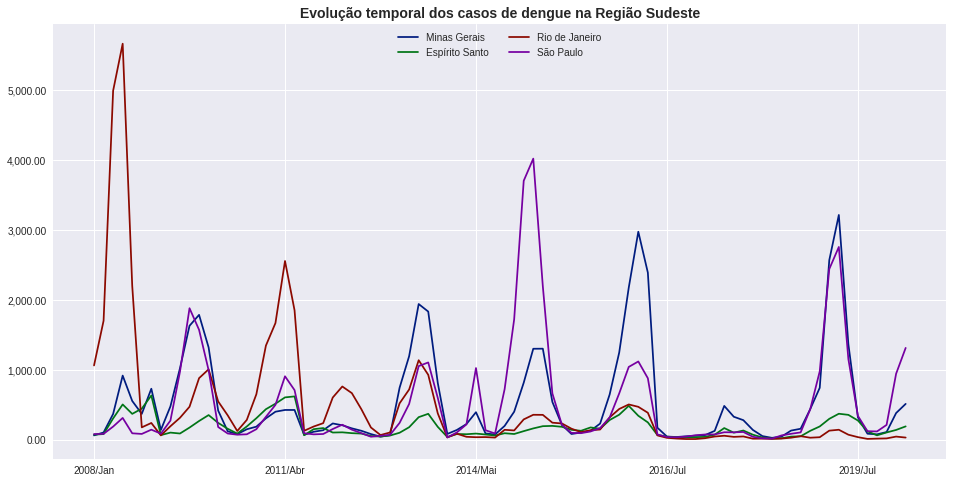

In [390]:
ax = df_dengue[df_dengue.Região == 'Sudeste'].drop(['Região', 'Total'], axis=1).T.plot(figsize = (16,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(loc='upper center', shadow=True, ncol = 2) 
plt.title('Evolução temporal dos casos de dengue na Região Sudeste', fontdict = {"fontsize":14, "fontweight":"bold"})
plt.show()

Percebemos então uma sazonalidade nos casos de dengue (o que é esperado), que não parece ter alguma correlação com os picos de gastos hospitalores observados anteriormente, apesar de o pico mais alto no começo para o estado do Rio de Janeiro também aparecer nesse gráfico. Pretendemos calcular a correlação entre essas duas séries temporais.

In [391]:
dados_usaveis.shape, df_dengue.shape

((27, 166), (27, 88))

Observamos então que os dois data frames que pretendemos usar tem tamanhos distintos. Há vários meses que não temos dados regristrados de dengue em alguns estados, provavelmente. Precisamos inserir eses dados como zero usando o comando fillna(). Para isso, utilizaremos as cópias dos data frames que criamos anteriormente:


In [392]:
df_original.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total,Região
0,Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"7,766,983.20","8,858,845.57","8,407,076.44","9,492,938.92","8,206,195.92","9,011,612.58","9,124,967.84","8,406,732.72","8,411,360.02","8,651,081.66","8,193,425.99","8,388,269.45","8,645,315.78","9,050,329.13","9,211,262.51","9,490,545.02","8,600,886.20","8,919,190.86","8,909,111.89","8,409,386.09","8,924,348.41","8,948,605.66","8,660,753.05","8,327,665.97","8,431,334.62","7,251,287.20","7,490,440.60","8,957,706.45","10,993,332.84","10,479,989.36","11,433,467.56","8,876,900.39","8,167,253.19","8,759,013.71","9,003,402.23","8,414,690.60","6,039,419.59","4,732,441.04","996,411,254.68",Norte
1,Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"2,769,797.39","3,057,631.96","2,874,965.31","3,175,575.17","3,060,903.21","3,253,011.61","3,040,645.05","2,926,179.27","3,126,120.64","2,473,454.85","2,277,493.49","2,594,347.32","2,234,388.36","2,473,008.49","2,979,764.77","3,070,533.95","3,249,052.69","3,567,538.64","2,981,072.98","2,998,860.31","3,293,378.97","3,174,249.43","2,959,569.09","3,276,790.55","2,985,763.71","2,939,675.20","2,672,857.33","2,940,827.86","3,914,823.86","4,053,085.41","3,658,265.59","3,470,409.45","3,267,918.69","3,393,958.27","3,711,660.71","3,005,561.16","2,272,733.90","1,137,341.65","450,048,530.47",Norte
2,Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"12,753,555.36","14,749,409.47","14,577,930.81","15,381,061.96","14,653,650.77","15,544,595.79","16,374,961.41","15,343,340.93","16,249,963.61","14,255,408.82","14,274,053.94","15,358,914.00","14,100,074.56","16,103,971.89","16,154,491.82","16,529,976.06","15,509,984.83","16,642,220.71","16,493,719.52","15,351,607.47","16,339,427.95","14,821,977.50","14,965,815.90","15,982,353.42","15,166,470.82","14,815,958.58","16,379,386.07","19,625,325.21","18,433,057.47","19,303,743.16","18,687,233.58","18,628,627.49","18,728,251.20","20,451,573.77","21,546,059.48","24,439,059.57","13,679,358.06","6,799,060.80","1,917,247,936.05",Norte
3,Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"2,478,349.44","2,674,958.94","2,721,261.19","2,844,811.66","2,967,161.35","2,841,587.97","3,328,230.63","2,878,691.04","2,964,324.32","2,524,712.40","2,462,451.64","2,662,240.18","2,499,996.16","2,846,135.56","2,789,823.29","2,839,389.53","2,647,540.20","2,865,777.71","3,181,321.82","3,070,436.96","3,162,342.44","3,121,104.71","2,889,969.87","3,084,561.08","2,967,159.04","2,813,954.05","2,306,119.95","2,921,522.16","3,300,012.98","3,192,075.41","3,262,354.34","2,978,629.22","3,313,296.78","3,527,263.23","3,125,021.90","3,209,323.68","3,044,798.77","2,381,844.31","328,876,965.09",Norte
4,Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"30,623,491.62","34,121,931.00","35,039,954.20","35,424,611.06","34,160,283.18","34,484,949.49","35,618,364.04","34,380,916.90","38,441,090.50","33,583,538.08","32,789,354.87","34,513,534.80","31,885,919.67","33,236,155.79","31,008,924.95","31,064,106.50","28,543,179.30","36,713,929.36","36,462,011.47","36,792,954.02","36,984,314.60","35,579,251.49","35,247,659.30","37,046,350.76","34,683,341.17

In [393]:
dados_dengue_original.head()

,Unidade da Federação,2007/Jul,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,...,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total,Região
0,Rondônia,-,-,-,-,2,77,202,237,237,209,65,29,22,21,19,11,44,49,169,276,460,372,293,136,120,130,126,264,665,1236,1544,1003,509,342,170,98,65,55,70,...,44,57,59,42,16,18,12,14,25,13,16,28,18,37,37,40,38,52,22,23,26,50,73,91,102,117,42,28,34,15,7,12,16,10,20,12,16,4,22386,Norte
1,Acre,-,-,-,-,1,3,15,13,12,24,18,6,4,1,7,7,8,34,107,150,117,59,27,21,20,10,6,17,33,65,95,157,145,101,53,22,15,8,9,...,19,12,13,9,12,6,8,11,32,38,43,48,25,29,17,16,11,12,9,18,25,42,83,96,81,23,8,7,3,5,3,8,7,27,92,67,95,47,4793,Norte
2,Amazonas,-,-,-,-,1,61,175,246,248,209,72,19,15,11,9,7,8,24,35,47,42,31,21,21,16,12,8,5,12,8,9,12,38,40,66,76,62,67,56,...,2,4,5,10,10,5,1,6,4,1,6,7,7,13,3,9,8,5,3,2,8,35,58,39,40,41,19,14,22,20,17,6,14,30,39,43,56,52,6490,Norte
3,Roraima,-,-,-,-,-,-,7,13,32,90,107,108,163,193,106,64,55,54,67,116,122,75,60,36,60,75,57,39,32,26,46,88,170,138,180,224,150,92,49,...,2,2,-,-,1,2,2,2,3,4,-,4,10,11,2,2,1,7,5,8,26,29,18,27,19,3,-,1,-,1,1,-,-,-,-,-,-,-,4069,Norte
4,Pará,-,4,12,38,163,610,1382,1324,1274,1385,781,429,204,166,181,218,341,370,547,748,894,680,451,362,253,169,113,151,220,234,329,426,702,632,611,553,468,604,629,...,83,109,137,94,56,45,51,55,43,46,57,103,127,147,163,148,77,60,49,46,46,71,46,133,179,132,52,33,18,3,11,8,8,11,15,17,30,22,50949,Norte


Vamos reconfigurar os índices:

In [394]:
dados_dengue_original.set_index('Unidade da Federação', inplace= True)
dados_dengue_original.head()

,2007/Jul,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,-,-,-,-,2,77,202,237,237,209,65,29,22,21,19,11,44,49,169,276,460,372,293,136,120,130,126,264,665,1236,1544,1003,509,342,170,98,65,55,70,95,...,44,57,59,42,16,18,12,14,25,13,16,28,18,37,37,40,38,52,22,23,26,50,73,91,102,117,42,28,34,15,7,12,16,10,20,12,16,4,22386,Norte
Acre,-,-,-,-,1,3,15,13,12,24,18,6,4,1,7,7,8,34,107,150,117,59,27,21,20,10,6,17,33,65,95,157,145,101,53,22,15,8,9,31,...,19,12,13,9,12,6,8,11,32,38,43,48,25,29,17,16,11,12,9,18,25,42,83,96,81,23,8,7,3,5,3,8,7,27,92,67,95,47,4793,Norte
Amazonas,-,-,-,-,1,61,175,246,248,209,72,19,15,11,9,7,8,24,35,47,42,31,21,21,16,12,8,5,12,8,9,12,38,40,66,76,62,67,56,69,...,2,4,5,10,10,5,1,6,4,1,6,7,7,13,3,9,8,5,3,2,8,35,58,39,40,41,19,14,22,20,17,6,14,30,39,43,56,52,6490,Norte
Roraima,-,-,-,-,-,-,7,13,32,90,107,108,163,193,106,64,55,54,67,116,122,75,60,36,60,75,57,39,32,26,46,88,170,138,180,224,150,92,49,24,...,2,2,-,-,1,2,2,2,3,4,-,4,10,11,2,2,1,7,5,8,26,29,18,27,19,3,-,1,-,1,1,-,-,-,-,-,-,-,4069,Norte
Pará,-,4,12,38,163,610,1382,1324,1274,1385,781,429,204,166,181,218,341,370,547,748,894,680,451,362,253,169,113,151,220,234,329,426,702,632,611,553,468,604,629,734,...,83,109,137,94,56,45,51,55,43,46,57,103,127,147,163,148,77,60,49,46,46,71,46,133,179,132,52,33,18,3,11,8,8,11,15,17,30,22,50949,Norte


In [395]:
df_original.set_index('Unidade da Federação', inplace= True)
df_original.head()

,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,2000/Abr,...,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"7,766,983.20","8,858,845.57","8,407,076.44","9,492,938.92","8,206,195.92","9,011,612.58","9,124,967.84","8,406,732.72","8,411,360.02","8,651,081.66","8,193,425.99","8,388,269.45","8,645,315.78","9,050,329.13","9,211,262.51","9,490,545.02","8,600,886.20","8,919,190.86","8,909,111.89","8,409,386.09","8,924,348.41","8,948,605.66","8,660,753.05","8,327,665.97","8,431,334.62","7,251,287.20","7,490,440.60","8,957,706.45","10,993,332.84","10,479,989.36","11,433,467.56","8,876,900.39","8,167,253.19","8,759,013.71","9,003,402.23","8,414,690.60","6,039,419.59","4,732,441.04","996,411,254.68",Norte
Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"2,769,797.39","3,057,631.96","2,874,965.31","3,175,575.17","3,060,903.21","3,253,011.61","3,040,645.05","2,926,179.27","3,126,120.64","2,473,454.85","2,277,493.49","2,594,347.32","2,234,388.36","2,473,008.49","2,979,764.77","3,070,533.95","3,249,052.69","3,567,538.64","2,981,072.98","2,998,860.31","3,293,378.97","3,174,249.43","2,959,569.09","3,276,790.55","2,985,763.71","2,939,675.20","2,672,857.33","2,940,827.86","3,914,823.86","4,053,085.41","3,658,265.59","3,470,409.45","3,267,918.69","3,393,958.27","3,711,660.71","3,005,561.16","2,272,733.90","1,137,341.65","450,048,530.47",Norte
Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"12,753,555.36","14,749,409.47","14,577,930.81","15,381,061.96","14,653,650.77","15,544,595.79","16,374,961.41","15,343,340.93","16,249,963.61","14,255,408.82","14,274,053.94","15,358,914.00","14,100,074.56","16,103,971.89","16,154,491.82","16,529,976.06","15,509,984.83","16,642,220.71","16,493,719.52","15,351,607.47","16,339,427.95","14,821,977.50","14,965,815.90","15,982,353.42","15,166,470.82","14,815,958.58","16,379,386.07","19,625,325.21","18,433,057.47","19,303,743.16","18,687,233.58","18,628,627.49","18,728,251.20","20,451,573.77","21,546,059.48","24,439,059.57","13,679,358.06","6,799,060.80","1,917,247,936.05",Norte
Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"2,478,349.44","2,674,958.94","2,721,261.19","2,844,811.66","2,967,161.35","2,841,587.97","3,328,230.63","2,878,691.04","2,964,324.32","2,524,712.40","2,462,451.64","2,662,240.18","2,499,996.16","2,846,135.56","2,789,823.29","2,839,389.53","2,647,540.20","2,865,777.71","3,181,321.82","3,070,436.96","3,162,342.44","3,121,104.71","2,889,969.87","3,084,561.08","2,967,159.04","2,813,954.05","2,306,119.95","2,921,522.16","3,300,012.98","3,192,075.41","3,262,354.34","2,978,629.22","3,313,296.78","3,527,263.23","3,125,021.90","3,209,323.68","3,044,798.77","2,381,844.31","328,876,965.09",Norte
Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"30,623,491.62","34,121,931.00","35,039,954.20","35,424,611.06","34,160,283.18","34,484,949.49","35,618,364.04","34,380,916.90","38,441,090.50","33,583,538.08","32,789,354.87","34,513,534.80","31,885,919.67","33,236,155.79","31,008,924.95","31,064,106.50","28,543,179.30","36,713,929.36","36,462,011.47","36,

Vemos que os dois data frame possuem quantidades distintas de colunas. Isso pois os dados de atendimentos começam em Março de 1992 enquanto que os dados de dengue começam em Julho de 2007. Queremos então considerar apenas os meses em comum. 

In [396]:
colunas_usadas = dados_dengue_original.columns.values.tolist()

In [397]:
df_original = df_original[colunas_usadas]
df_original.head()

,2007/Jul,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,-,"4,209.37","16,397.03","133,645.19","346,912.84","711,758.31","1,829,559.71","1,940,792.63","1,955,721.68","2,143,353.81","2,280,382.58","2,624,542.97","2,973,421.02","2,938,286.29","2,843,930.91","2,878,153.20","2,780,022.62","2,651,804.89","3,147,566.24","3,082,108.12","4,190,355.33","4,040,251.62","3,946,423.71","3,372,377.96","3,720,608.86","3,787,323.26","3,679,369.94","3,866,146.99","3,667,808.60","3,633,471.79","3,812,315.59","3,911,776.03","4,663,060.75","4,524,544.88","4,778,755.26","4,369,733.23","4,632,439.12","4,464,307.47","4,668,642.02","4,490,368.23",...,"7,766,983.20","8,858,845.57","8,407,076.44","9,492,938.92","8,206,195.92","9,011,612.58","9,124,967.84","8,406,732.72","8,411,360.02","8,651,081.66","8,193,425.99","8,388,269.45","8,645,315.78","9,050,329.13","9,211,262.51","9,490,545.02","8,600,886.20","8,919,190.86","8,909,111.89","8,409,386.09","8,924,348.41","8,948,605.66","8,660,753.05","8,327,665.97","8,431,334.62","7,251,287.20","7,490,440.60","8,957,706.45","10,993,332.84","10,479,989.36","11,433,467.56","8,876,900.39","8,167,253.19","8,759,013.71","9,003,402.23","8,414,690.60","6,039,419.59","4,732,441.04","996,411,254.68",Norte
Acre,-,"10,470.07","14,001.71","86,200.85","301,323.68","769,612.36","1,731,744.62","1,743,978.66","2,057,439.02","2,057,829.69","2,226,577.93","2,112,576.82","2,029,128.01","1,886,871.84","2,084,884.80","2,230,838.45","2,122,013.12","2,196,651.69","2,152,239.30","2,086,775.61","2,476,364.26","2,396,887.63","2,610,261.80","2,174,098.10","2,051,885.16","1,714,707.91","1,341,532.34","2,288,458.90","2,462,712.79","2,254,900.20","2,381,535.93","2,079,981.05","2,564,837.77","2,588,318.06","2,538,525.67","2,319,786.41","2,279,156.60","2,454,599.37","2,578,923.75","2,625,443.29",...,"2,769,797.39","3,057,631.96","2,874,965.31","3,175,575.17","3,060,903.21","3,253,011.61","3,040,645.05","2,926,179.27","3,126,120.64","2,473,454.85","2,277,493.49","2,594,347.32","2,234,388.36","2,473,008.49","2,979,764.77","3,070,533.95","3,249,052.69","3,567,538.64","2,981,072.98","2,998,860.31","3,293,378.97","3,174,249.43","2,959,569.09","3,276,790.55","2,985,763.71","2,939,675.20","2,672,857.33","2,940,827.86","3,914,823.86","4,053,085.41","3,658,265.59","3,470,409.45","3,267,918.69","3,393,958.27","3,711,660.71","3,005,561.16","2,272,733.90","1,137,341.65","450,048,530.47",Norte
Amazonas,212.75,"35,752.72","45,570.64","416,012.30","2,020,381.79","5,949,408.99","11,419,210.08","7,934,652.10","8,641,517.13","8,531,576.49","9,079,902.15","8,646,295.77","8,755,806.50","8,331,763.97","8,148,089.92","7,681,661.02","7,761,445.21","7,764,782.66","8,607,222.74","8,385,962.92","9,207,129.28","8,160,517.20","8,562,322.43","9,484,998.71","9,465,068.52","9,267,006.58","9,092,823.55","9,218,407.34","8,674,068.02","8,365,788.46","9,386,945.03","8,373,048.81","10,321,150.01","9,990,164.13","9,767,161.23","9,151,838.50","9,140,196.88","9,437,224.41","9,742,680.49","9,996,686.44",...,"12,753,555.36","14,749,409.47","14,577,930.81","15,381,061.96","14,653,650.77","15,544,595.79","16,374,961.41","15,343,340.93","16,249,963.61","14,255,408.82","14,274,053.94","15,358,914.00","14,100,074.56","16,103,971.

Percebemos então que os dados faltantes não estão nulos, mas indicados por '-'. Não podemos usar o fillna(). Teremos que usar o replace() para tratar esses dados. 

In [398]:
df_original.replace('-', 0, inplace= True)
df_original.head()

,2007/Jul,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,0,"4,209.37","16,397.03","133,645.19","346,912.84","711,758.31","1,829,559.71","1,940,792.63","1,955,721.68","2,143,353.81","2,280,382.58","2,624,542.97","2,973,421.02","2,938,286.29","2,843,930.91","2,878,153.20","2,780,022.62","2,651,804.89","3,147,566.24","3,082,108.12","4,190,355.33","4,040,251.62","3,946,423.71","3,372,377.96","3,720,608.86","3,787,323.26","3,679,369.94","3,866,146.99","3,667,808.60","3,633,471.79","3,812,315.59","3,911,776.03","4,663,060.75","4,524,544.88","4,778,755.26","4,369,733.23","4,632,439.12","4,464,307.47","4,668,642.02","4,490,368.23",...,"7,766,983.20","8,858,845.57","8,407,076.44","9,492,938.92","8,206,195.92","9,011,612.58","9,124,967.84","8,406,732.72","8,411,360.02","8,651,081.66","8,193,425.99","8,388,269.45","8,645,315.78","9,050,329.13","9,211,262.51","9,490,545.02","8,600,886.20","8,919,190.86","8,909,111.89","8,409,386.09","8,924,348.41","8,948,605.66","8,660,753.05","8,327,665.97","8,431,334.62","7,251,287.20","7,490,440.60","8,957,706.45","10,993,332.84","10,479,989.36","11,433,467.56","8,876,900.39","8,167,253.19","8,759,013.71","9,003,402.23","8,414,690.60","6,039,419.59","4,732,441.04","996,411,254.68",Norte
Acre,0,"10,470.07","14,001.71","86,200.85","301,323.68","769,612.36","1,731,744.62","1,743,978.66","2,057,439.02","2,057,829.69","2,226,577.93","2,112,576.82","2,029,128.01","1,886,871.84","2,084,884.80","2,230,838.45","2,122,013.12","2,196,651.69","2,152,239.30","2,086,775.61","2,476,364.26","2,396,887.63","2,610,261.80","2,174,098.10","2,051,885.16","1,714,707.91","1,341,532.34","2,288,458.90","2,462,712.79","2,254,900.20","2,381,535.93","2,079,981.05","2,564,837.77","2,588,318.06","2,538,525.67","2,319,786.41","2,279,156.60","2,454,599.37","2,578,923.75","2,625,443.29",...,"2,769,797.39","3,057,631.96","2,874,965.31","3,175,575.17","3,060,903.21","3,253,011.61","3,040,645.05","2,926,179.27","3,126,120.64","2,473,454.85","2,277,493.49","2,594,347.32","2,234,388.36","2,473,008.49","2,979,764.77","3,070,533.95","3,249,052.69","3,567,538.64","2,981,072.98","2,998,860.31","3,293,378.97","3,174,249.43","2,959,569.09","3,276,790.55","2,985,763.71","2,939,675.20","2,672,857.33","2,940,827.86","3,914,823.86","4,053,085.41","3,658,265.59","3,470,409.45","3,267,918.69","3,393,958.27","3,711,660.71","3,005,561.16","2,272,733.90","1,137,341.65","450,048,530.47",Norte
Amazonas,212.75,"35,752.72","45,570.64","416,012.30","2,020,381.79","5,949,408.99","11,419,210.08","7,934,652.10","8,641,517.13","8,531,576.49","9,079,902.15","8,646,295.77","8,755,806.50","8,331,763.97","8,148,089.92","7,681,661.02","7,761,445.21","7,764,782.66","8,607,222.74","8,385,962.92","9,207,129.28","8,160,517.20","8,562,322.43","9,484,998.71","9,465,068.52","9,267,006.58","9,092,823.55","9,218,407.34","8,674,068.02","8,365,788.46","9,386,945.03","8,373,048.81","10,321,150.01","9,990,164.13","9,767,161.23","9,151,838.50","9,140,196.88","9,437,224.41","9,742,680.49","9,996,686.44",...,"12,753,555.36","14,749,409.47","14,577,930.81","15,381,061.96","14,653,650.77","15,544,595.79","16,374,961.41","15,343,340.93","16,249,963.61","14,255,408.82","14,274,053.94","15,358,914.00","14,100,074.56","16,103,971.

In [399]:
dados_dengue_original.replace('-', 0, inplace= True)
dados_dengue_original.head()

,2007/Jul,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,0,0,0,0,2,77,202,237,237,209,65,29,22,21,19,11,44,49,169,276,460,372,293,136,120,130,126,264,665,1236,1544,1003,509,342,170,98,65,55,70,95,...,44,57,59,42,16,18,12,14,25,13,16,28,18,37,37,40,38,52,22,23,26,50,73,91,102,117,42,28,34,15,7,12,16,10,20,12,16,4,22386,Norte
Acre,0,0,0,0,1,3,15,13,12,24,18,6,4,1,7,7,8,34,107,150,117,59,27,21,20,10,6,17,33,65,95,157,145,101,53,22,15,8,9,31,...,19,12,13,9,12,6,8,11,32,38,43,48,25,29,17,16,11,12,9,18,25,42,83,96,81,23,8,7,3,5,3,8,7,27,92,67,95,47,4793,Norte
Amazonas,0,0,0,0,1,61,175,246,248,209,72,19,15,11,9,7,8,24,35,47,42,31,21,21,16,12,8,5,12,8,9,12,38,40,66,76,62,67,56,69,...,2,4,5,10,10,5,1,6,4,1,6,7,7,13,3,9,8,5,3,2,8,35,58,39,40,41,19,14,22,20,17,6,14,30,39,43,56,52,6490,Norte
Roraima,0,0,0,0,0,0,7,13,32,90,107,108,163,193,106,64,55,54,67,116,122,75,60,36,60,75,57,39,32,26,46,88,170,138,180,224,150,92,49,24,...,2,2,0,0,1,2,2,2,3,4,0,4,10,11,2,2,1,7,5,8,26,29,18,27,19,3,0,1,0,1,1,0,0,0,0,0,0,0,4069,Norte
Pará,0,4,12,38,163,610,1382,1324,1274,1385,781,429,204,166,181,218,341,370,547,748,894,680,451,362,253,169,113,151,220,234,329,426,702,632,611,553,468,604,629,734,...,83,109,137,94,56,45,51,55,43,46,57,103,127,147,163,148,77,60,49,46,46,71,46,133,179,132,52,33,18,3,11,8,8,11,15,17,30,22,50949,Norte


Para nossa análise, vamos criar duas séries temporais: uma com a soma do total de gastos em cada mês e outra com a soma do número de casos em cada, a soma tomada sob os quatro estados da região sudeste. 

In [400]:
atendimento_total_sudeste = df_original.drop(['Região', 'Total'], axis = 1).astype(float)[df_original['Região'] == 'Sudeste'].sum().values
atendimento_total_sudeste

array([5.45973130e+05, 3.16362172e+06, 8.50182151e+06, 2.87421870e+07,
       6.63094529e+07, 1.39449388e+08, 1.51199961e+09, 2.97424135e+08,
       3.04838598e+08, 3.07144452e+08, 3.07471264e+08, 3.11112980e+08,
       3.18343758e+08, 3.15264066e+08, 3.18114200e+08, 3.37872933e+08,
       3.29651451e+08, 3.21578886e+08, 3.65764342e+08, 3.14887535e+08,
       3.84514188e+08, 3.70079947e+08, 3.76533307e+08, 3.80028898e+08,
       3.82813625e+08, 3.81120389e+08, 3.75825806e+08, 3.76238626e+08,
       3.68221134e+08, 3.42816186e+08, 3.79332900e+08, 3.44427983e+08,
       4.18150137e+08, 4.15351652e+08, 4.09359467e+08, 3.90334948e+08,
       3.97326491e+08, 4.31474388e+08, 3.98253497e+08, 4.09022612e+08,
       3.94312591e+08, 3.76600657e+08, 4.26948661e+08, 4.01770036e+08,
       4.25572704e+08, 4.08229247e+08, 4.43098565e+08, 4.19794896e+08,
       4.22401500e+08, 4.40071736e+08, 4.13172910e+08, 4.14249060e+08,
       3.98259858e+08, 3.80367096e+08, 4.40530746e+08, 3.90685011e+08,
      

In [401]:
casos_dengue_sudeste_total = dados_dengue_original.drop(['Região', 'Total'], axis = 1).astype(int)[df_original['Região'] == 'Sudeste'].sum().values
casos_dengue_sudeste_total

array([   0,    0,    0,    9,   35,  276, 1283, 1976, 5861, 7407, 3223,
       1064,  259,  142,  135,  140,  197,  310,  662, 1079, 1751, 1604,
       1338,  683,  299,  148,   93,   85,  188,  359, 1050, 2403, 4163,
       4513, 3681, 1392,  720,  602,  395,  324,  369,  706, 1301, 2422,
       3090, 4502, 3612, 1321,  492,  331,  296,  360,  370,  535,  626,
        718, 1097, 1294, 1072,  750,  356,  248,  166,  217,  303,  652,
       1610, 2610, 4461, 4244, 1975,  688,  332,  186,  170,  195,  192,
        253,  417,  568,  974, 1969, 1548,  626,  343,  179,  219,  240,
        259,  332, 1161, 2344, 4940, 5848, 4054, 1650,  847,  484,  438,
        563,  705, 1572, 2713, 4213, 4915, 3909, 1559,  382,  159,  130,
        142,  173,  209,  325,  819,  581,  574,  355,  273,  125,   76,
         73,  149,  186,  147,  188,  272,  294,  366,  535,  436,  234,
        186,  125,   92,  162,  225,  454, 1031, 1951, 3174, 5446, 6495,
       2953,  978,  344,  235,  277,  279,  449, 15

Agora estamos prontos para calcular a correlação. Para o caso de arrays, podemos fazer isso utilizando o comando corrcoef() do Numpy:

In [402]:
np.corrcoef(casos_dengue_sudeste_total,atendimento_total_sudeste)

array([[1.        , 0.01693962],
       [0.01693962, 1.        ]])

Vemos então que essas duas séries  temporais tem correlação quase zero. Concluímos que não há relação entre o número de casos de dengue na região Sudeste e os gastos do SUS na mesma região. 